<small>

Author: Felipe Garaycochea Lozada   
Student Code: 22500219

</small>

# Initial settings

## Libraries

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['font.family'] = 'DejaVu Sans'

## Dataset Download

In [200]:
from dataset_download import dataset_download

dataset_download("cid007/mental-disorder-classification")

🗃️ Downloading from Kaggle: cid007/mental-disorder-classification
Dataset URL: https://www.kaggle.com/datasets/cid007/mental-disorder-classification
✅ Download completed


'dataset/Dataset-Mental-Disorders.csv'

# EDA

In [201]:
data = pd.read_csv("dataset/Dataset-Mental-Disorders.csv")
data.head()

Patient Number    Sadness    Euphoric  Exhausted Sleep dissorder Mood Swing  \
0     Patiant-01    Usually      Seldom  Sometimes       Sometimes        YES   
1     Patiant-02    Usually      Seldom    Usually       Sometimes         NO   
2     Patiant-03  Sometimes  Most-Often  Sometimes       Sometimes        YES   
3     Patiant-04    Usually      Seldom    Usually      Most-Often        YES   
4     Patiant-05    Usually     Usually  Sometimes       Sometimes         NO   

  Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0              YES       NO                NO             YES   
1               YES      NO                NO              NO   
2                NO      NO                NO             YES   
3               YES     YES                NO             YES   
4                NO      NO                NO              NO   

  Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
0                  NO               NO                YES            YES   
1                  NO               NO                 NO             NO   
2                 YES               NO                YES            YES   
3                  NO               NO                 NO             NO   
4                  NO               NO                YES            YES   

  Overthinking Sexual Activity Concentration  Optimisim Expert Diagnose  
0          YES       3 From 10     3 From 10  4 From 10  Bipolar Type-2  
1           NO       4 From 10     2 From 10  5 From 10      Depression  
2           NO       6 From 10     5 From 10  7 From 10  Bipolar Type-1  
3           NO       3 From 10     2 From 10  2 From 10  Bipolar Type-2  
4          YES       5 From 10     5 From 10  6 From 10          Normal

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

## Data cleaning and preprocessing

Initial data cleaning and transformation processes are carried out, based on their structure and content, in order to facilitate and improve subsequent analysis.

In [203]:
def print_unique_values(data, cols):
    for col in cols:
        print(f"{col} → {data[col].unique()} | dtype: {data[col].dtype}")

### Normalizing column names

Standardizes column headers by converting to lowercase, removing accents, replacing non-alphanumeric characters with underscores, and trimming extra underscores ensuring clean, consistent names for analysis.

In [204]:
import unicodedata
import re

def normalize_column_name(col):
    col = col.lower()
    col = ''.join(
        (c for c in unicodedata.normalize('NFD', col) if unicodedata.category(c) != 'Mn')
    )
    col = re.sub(r'[^\w]+', '_', col)
    col = col.strip('_')
    return col

data.columns = [normalize_column_name(c) for c in data.columns]

data.columns

Index(['patient_number', 'sadness', 'euphoric', 'exhausted', 'sleep_dissorder',
       'mood_swing', 'suicidal_thoughts', 'anorxia', 'authority_respect',
       'try_explanation', 'aggressive_response', 'ignore_move_on',
       'nervous_break_down', 'admit_mistakes', 'overthinking',
       'sexual_activity', 'concentration', 'optimisim', 'expert_diagnose'],
      dtype='object')

### Deleting irrelevant columns

The 'Patient Number' column is removed as it does not provide analytical value to the model.

In [205]:
data = data.drop(columns="patient_number")

### Analysis of unique values ​​in each feature

Displays the unique values in each column to explore categorical distributions and detect potential data inconsistencies.

In [206]:
print_unique_values(data, data.columns.to_list())

sadness → ['Usually' 'Sometimes' 'Seldom' 'Most-Often'] | dtype: object
euphoric → ['Seldom' 'Most-Often' 'Usually' 'Sometimes'] | dtype: object
exhausted → ['Sometimes' 'Usually' 'Seldom' 'Most-Often'] | dtype: object
sleep_dissorder → ['Sometimes' 'Most-Often' 'Usually' 'Seldom'] | dtype: object
mood_swing → ['YES' 'NO'] | dtype: object
suicidal_thoughts → ['YES ' 'YES' 'NO'] | dtype: object
anorxia → ['NO' 'YES'] | dtype: object
authority_respect → ['NO' 'YES'] | dtype: object
try_explanation → ['YES' 'NO'] | dtype: object
aggressive_response → ['NO' 'YES'] | dtype: object
ignore_move_on → ['NO' 'YES'] | dtype: object
nervous_break_down → ['YES' 'NO'] | dtype: object
admit_mistakes → ['YES' 'NO'] | dtype: object
overthinking → ['YES' 'NO'] | dtype: object
sexual_activity → ['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10'] | dtype: object
concentration → ['3 From 10' '2 From 10' '5 From 10' '4 From 10' '7 From 10' '6 From 1

Spaces are removed from the values ​​in the 'suicidal_thoughts' column to correct formatting errors and ensure consistency in categorical data.

In [207]:
data['suicidal_thoughts'] = data['suicidal_thoughts'].str.replace(" ", "")
data["suicidal_thoughts"].unique()

array(['YES', 'NO'], dtype=object)

### Converting text to numeric values

- The columns "sexual_activity", "concentration", and "optimisim" contain text representing ordinal numeric scales, expressed as values from 1 to 10

- The columns "sadness", "euphoric", "exhausted", and "sleep_dissorder" contain ordinal categorical values, expressed as frequency labels

In [208]:
ordinal_num_cols = ["sexual_activity", "concentration", "optimisim"]
ordinal_cat_cols = ['sadness', 'euphoric', 'exhausted', 'sleep_dissorder']
print("ordinal_num_cols")
print_unique_values(data, ordinal_num_cols)
print("\n")
print("ordinal_cat_cols")
print_unique_values(data, ordinal_cat_cols)

ordinal_num_cols
sexual_activity → ['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10'] | dtype: object
concentration → ['3 From 10' '2 From 10' '5 From 10' '4 From 10' '7 From 10' '6 From 10'
 '1 From 10' '8 From 10'] | dtype: object
optimisim → ['4 From 10' '5 From 10' '7 From 10' '2 From 10' '6 From 10' '9 From 10'
 '3 From 10' '8 From 10' '1 From 10'] | dtype: object


ordinal_cat_cols
sadness → ['Usually' 'Sometimes' 'Seldom' 'Most-Often'] | dtype: object
euphoric → ['Seldom' 'Most-Often' 'Usually' 'Sometimes'] | dtype: object
exhausted → ['Sometimes' 'Usually' 'Seldom' 'Most-Often'] | dtype: object
sleep_dissorder → ['Sometimes' 'Most-Often' 'Usually' 'Seldom'] | dtype: object


'sexual_activity', 'concentration', and 'optimism' were mapped to ordinal integer values

In [209]:
def extract_score(value):
    return int(value.split()[0])

for col in ordinal_num_cols:
    data[col] = data[col].apply(extract_score)

print_unique_values(data, ordinal_num_cols)

sexual_activity → [3 4 6 5 7 8 9 2 1] | dtype: int64
concentration → [3 2 5 4 7 6 1 8] | dtype: int64
optimisim → [4 5 7 2 6 9 3 8 1] | dtype: int64


'sadness', 'euphoric', 'exhausted', and 'sleep_dissorder' values ​​are standardized and assigned numerical values

In [210]:
ordinal_map = {
    'seldom': 1,
    'sometimes': 2,
    'usually': 3,
    'most-often': 4
}

for col in ordinal_cat_cols:
    data[col] = data[col].str.lower().str.replace('-', ' ').str.strip()
    data[col] = data[col].replace({'most often': 'most-often'})
    data[col] = data[col].map(ordinal_map)

print_unique_values(data, ordinal_cat_cols)

sadness → [3 2 1 4] | dtype: int64
euphoric → [1 4 3 2] | dtype: int64
exhausted → [2 3 1 4] | dtype: int64
sleep_dissorder → [2 4 3 1] | dtype: int64


### Deleting Duplicate Records

In [211]:
from EDA_utils import delete_duplicated_data

delete_duplicated_data(data)

Duplicate Records (before): 0
Duplicate Records (after): 0


### Deleting Null Data

In [212]:
print(data.isna().sum())
original_rows = len(data)
data = data.dropna()
rows_removed = original_rows - len(data)
print("\n-------------------")
print(f"{rows_removed} rows with null values ​​were removed.")

sadness                0
euphoric               0
exhausted              0
sleep_dissorder        0
mood_swing             0
suicidal_thoughts      0
anorxia                0
authority_respect      0
try_explanation        0
aggressive_response    0
ignore_move_on         0
nervous_break_down     0
admit_mistakes         0
overthinking           0
sexual_activity        0
concentration          0
optimisim              0
expert_diagnose        0
dtype: int64

-------------------
0 rows with null values ​​were removed.


## Variables Analysis

In [213]:
from EDA_utils import get_columns_type

num_cols, cat_cols = get_columns_type(data)

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['sadness', 'euphoric', 'exhausted', 'sleep_dissorder', 'sexual_activity', 'concentration', 'optimisim']
Categorical Columns: ['mood_swing', 'suicidal_thoughts', 'anorxia', 'authority_respect', 'try_explanation', 'aggressive_response', 'ignore_move_on', 'nervous_break_down', 'admit_mistakes', 'overthinking', 'expert_diagnose']


### Univariate Analysis

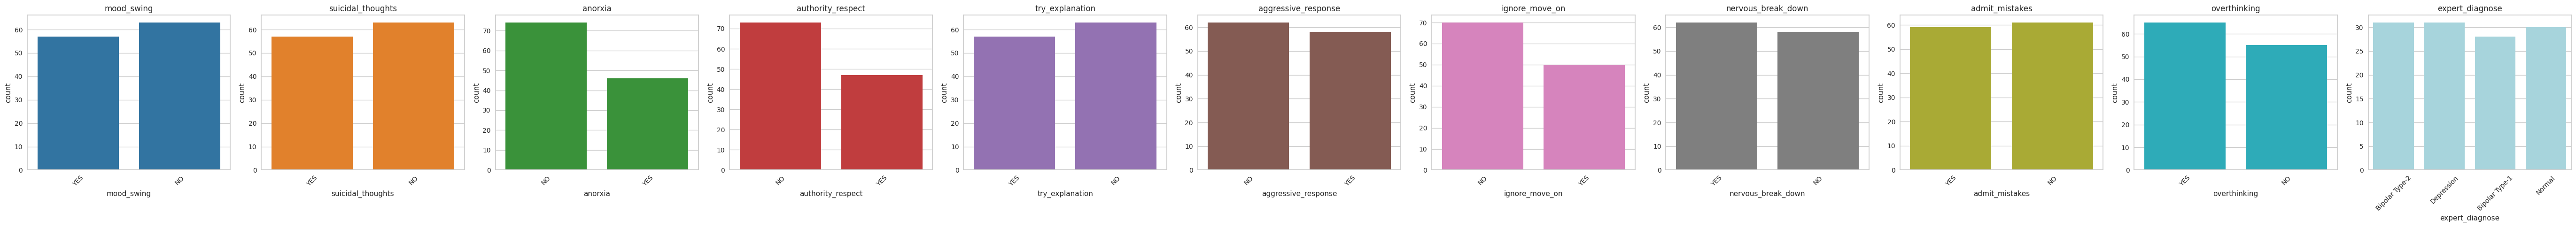

In [214]:
from EDA_utils import plot_categorical_distributions

plot_categorical_distributions(data, cat_cols)

<small>

- 😐 Mood Swing: The distribution is relatively balanced between those reporting 'NO' (~63) and 'YES' (~57) to experiencing mood swings, with a slightly higher number indicating they do not experience mood swings.

- 💭 Suicidal Thoughts: Responses are nearly evenly split between 'NO' (~63) and 'YES' (~57), with a small majority indicating they do not experience suicidal thoughts.

- 🍽️ Anorexia: A significantly larger number of individuals reported 'NO' (~73) compared to 'YES' (~47), suggesting that most participants do not have anorexia.

- 🧑‍⚖️ Authority Respect: More participants reported 'NO' (~72) than 'YES' (~47), indicating that the majority do not respect authority, which may reflect rebellion or mistrust.

- 🗣️ Try Explanation: The responses are close, with a slight majority indicating 'NO' (~63) over 'YES' (~57), suggesting most people do not try to explain themselves.

- 😠 Aggressive Response: The distribution is almost balanced, with a small majority responding 'NO' (~62) over 'YES' (~58), implying slightly more people do not respond aggressively.

- 🚶‍♂️ Ignore & Move On: There is a clear majority of individuals reporting 'NO' (~70), compared to 'YES' (~50), indicating that most people do not ignore the situation and move on.

- 😵 Nervous Breakdown: Responses are quite balanced, with a slight majority reporting 'YES' (~61) over 'NO' (~58), suggesting that nervous breakdowns are common among respondents.

- 🙅‍♂️ Admit Mistakes: The split is nearly equal, with a slight edge towards 'NO' (~62) compared to 'YES' (~58), implying that not admitting mistakes is just slightly more common.

- 🤯 Overthinking: A slightly higher number of participants reported 'YES' (~64) compared to 'NO' (~54), showing that overthinking is a common issue.

- 🧠 Expert Diagnose: The distribution across expert diagnostic categories is relatively even. 'Bipolar Type-2' and 'Depression' have slightly higher counts (~31 each), followed by 'Normal' (~30) and 'Bipolar Type-1' (~28). This suggests a diverse representation of mental health diagnoses in the dataset.

</small>

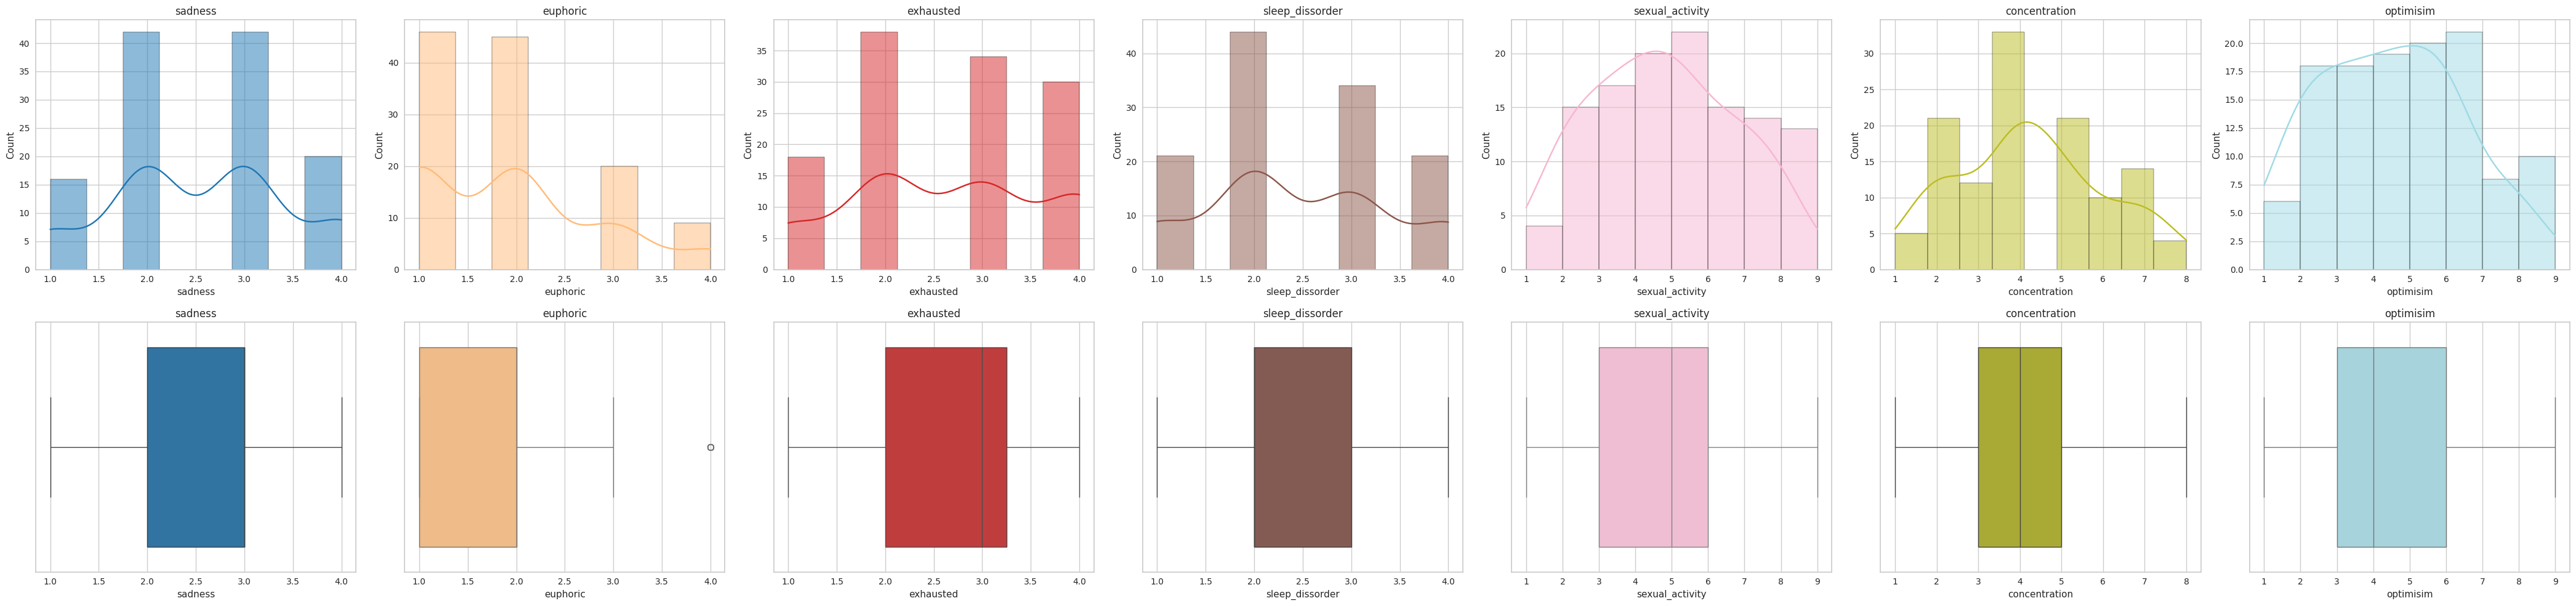

In [215]:
from EDA_utils import plot_numeric_distributions

plot_numeric_distributions(data, num_cols)

<small>

- 😢 Sadness: The distribution is multimodal, with peaks at levels 2 and 3. The box plot shows a median of 3, and the interquartile range (IQR) spans from 2 to 3, indicating that most individuals report relatively high levels of sadness.

- 😐 Euphoric: The distribution is left-skewed, with a strong concentration around level 1. The box plot shows a median of 2 with an IQR concentrated between 1 and 2, showing that most participants report low levels of euphoria. Outliers at higher levels suggest that some individuals experience more intense euphoria.

- 🥱 Exhaustion: This variable has a bimodal distribution with peaks around levels 2 and 3. The box plot shows a median of 3, and the IQR ranges from 2 to 3.25, implying that mild to moderate exhaustion is commonly reported.

- 😴 Sleep Disorder: The distribution is multimodal, with a clear peak at level 2 and a low peak at level 3.The box plot shows a median of 2 and the IQR ranges from 2 to 3, indicating that mild and moderate sleep disturbance symptoms are the most common.

- 💞 Sexual Activity: This variable shows a bell-shaped distribution, peaking around level 5. The box plot shows a median of 5, and the IQR covers values from 3 to 6, suggesting a moderate and centralized tendency in reported sexual activity.

- 🧠 Concentration: The distribution is somewhat multimodal, with a noticeable peak at level 4. The box plot shows a median of 4, and the IQR ranges from 3 to 5, suggesting that most individuals report moderate concentration levels, with some variability.

- 🌞 Optimisim: The distribution is somewhat bell-shaped, with a peak around values 4 and 6, and a gradual decrease towards the lower and higher ends. The boxplot indicates a median of 4, with the interquartile range (IQR) spanning values from 3 to 6. This suggests that optimism levels tend to be moderate to high in this dataset.

</small>

### Multivariate analysis

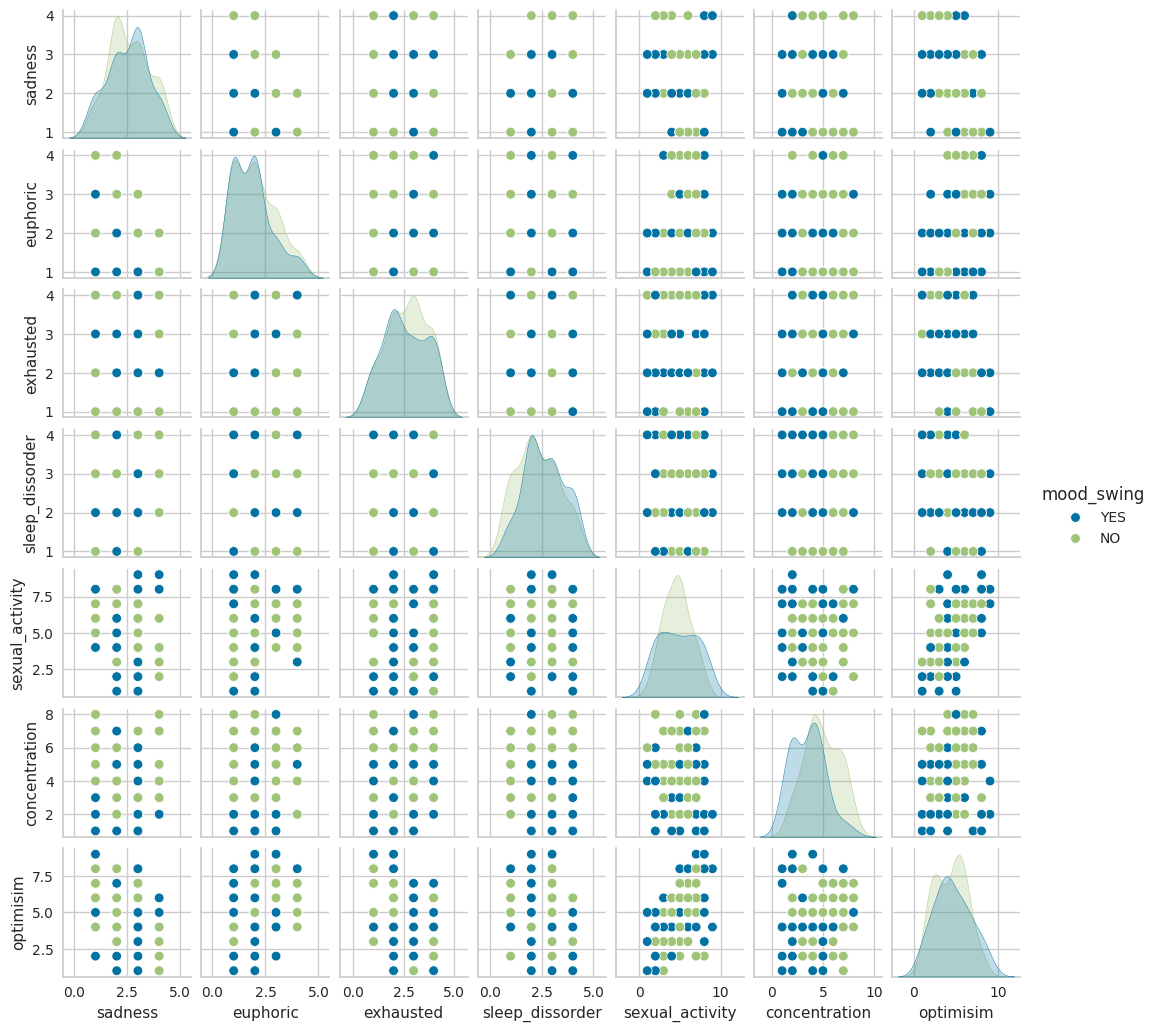

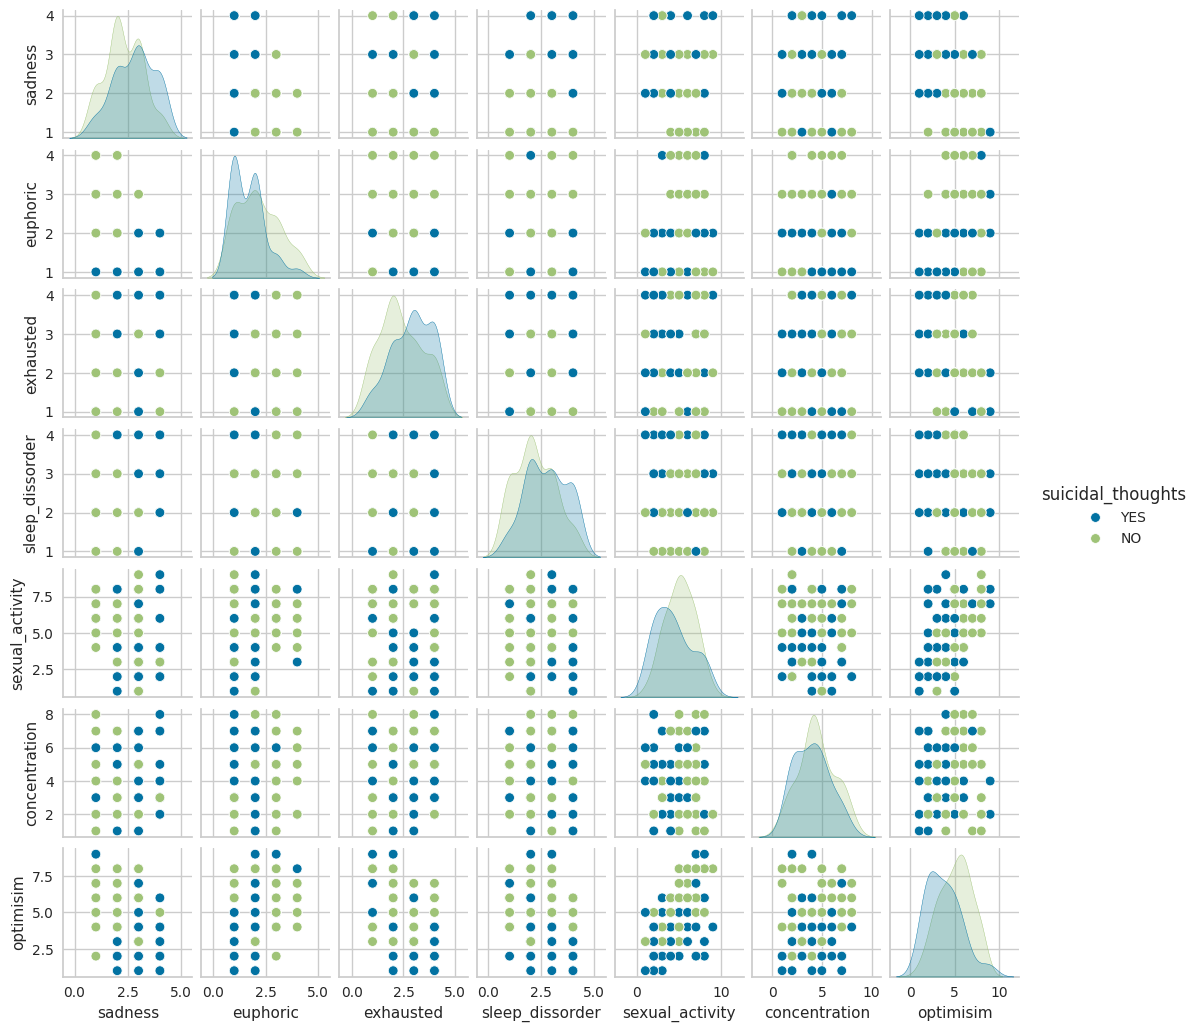

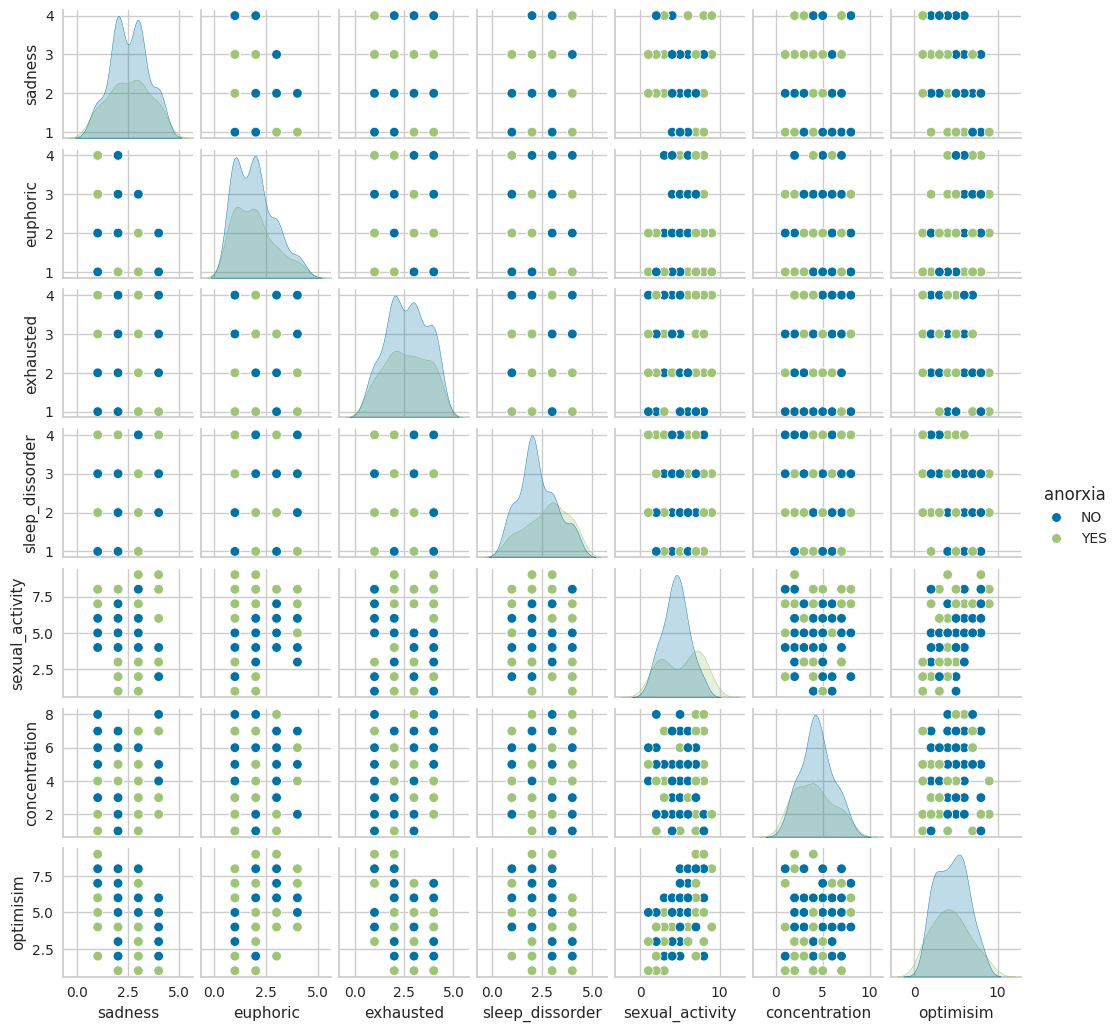

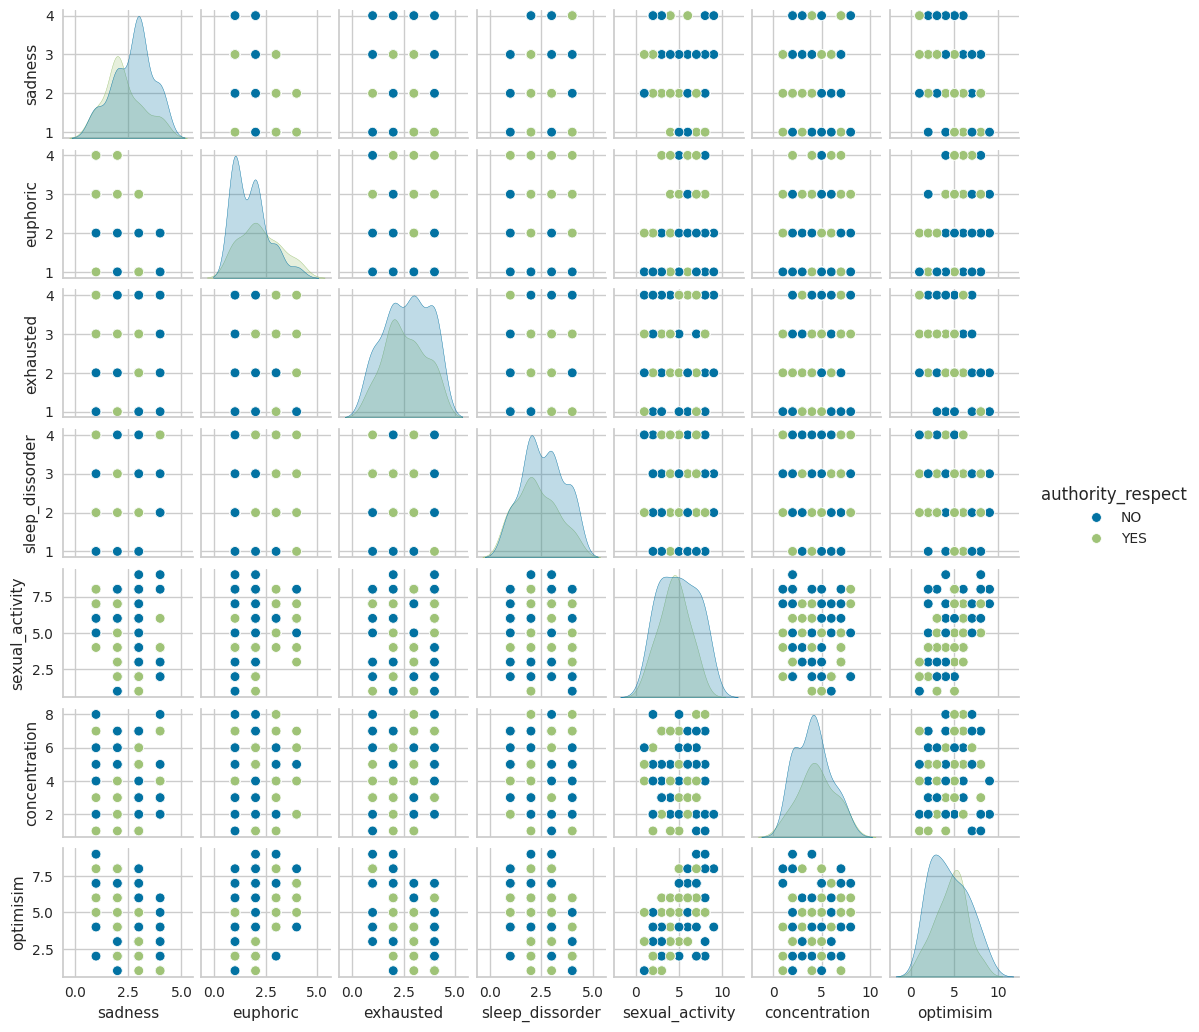

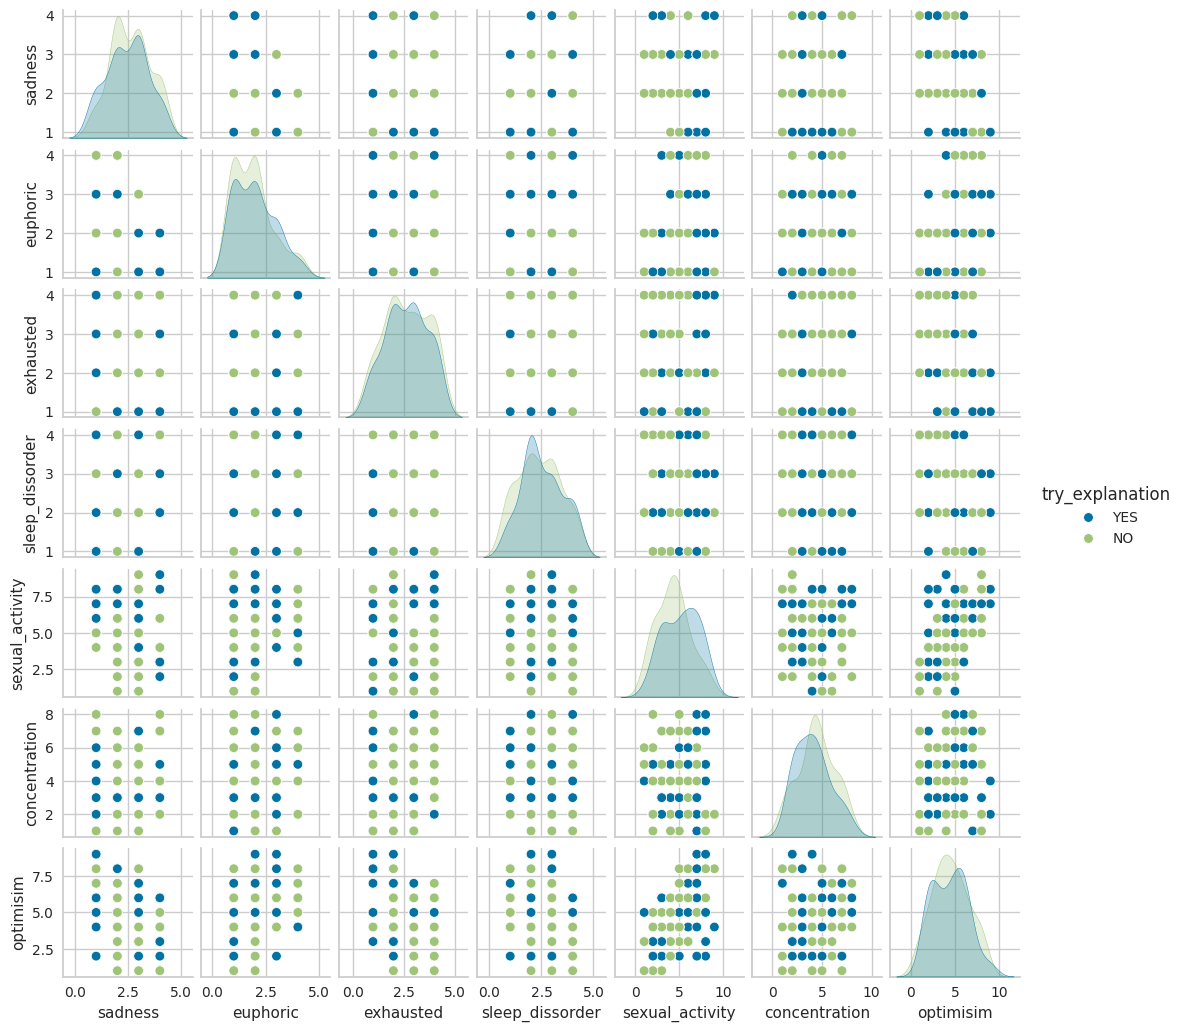

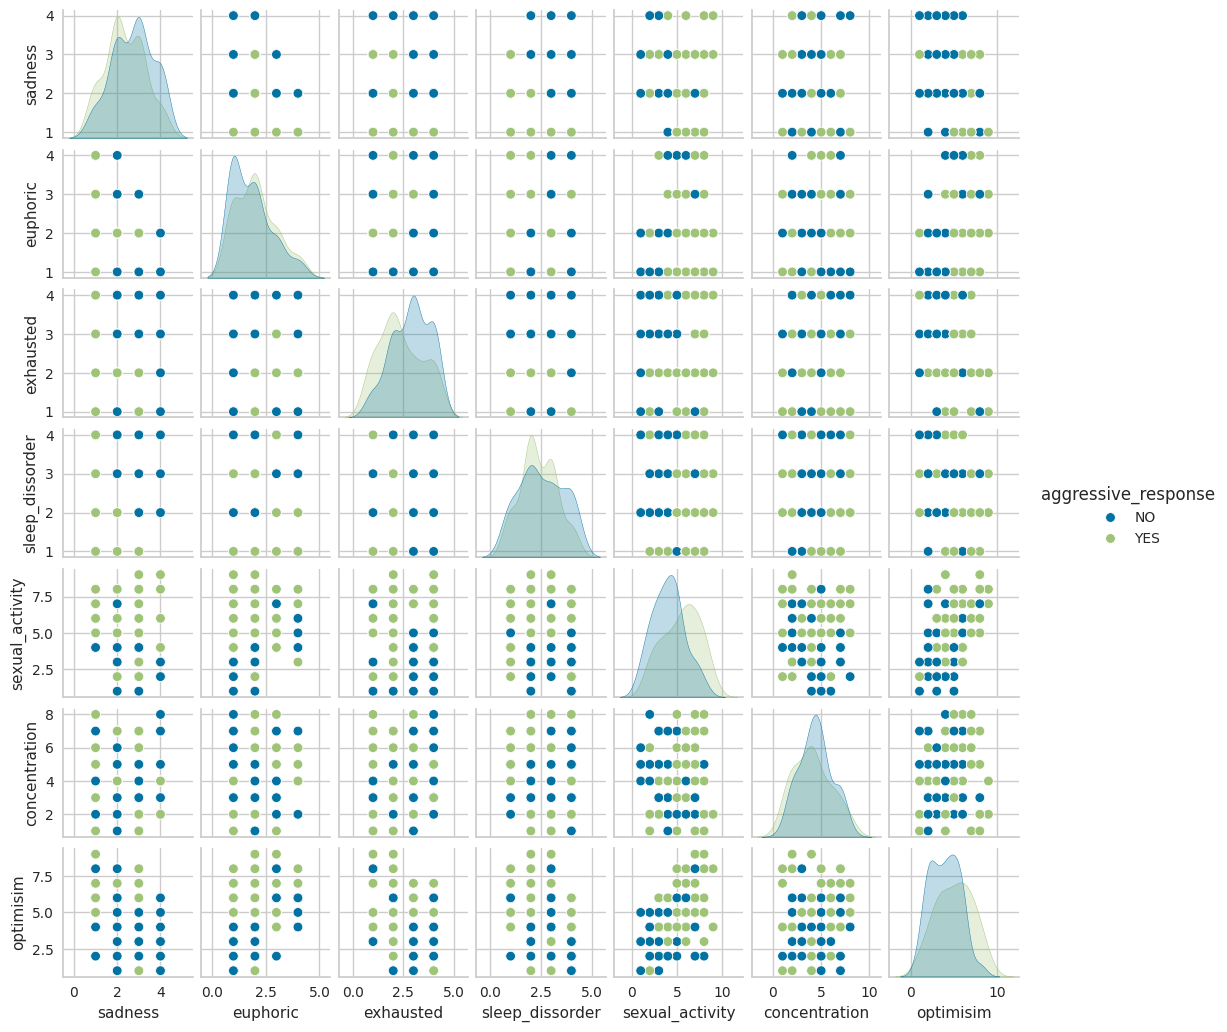

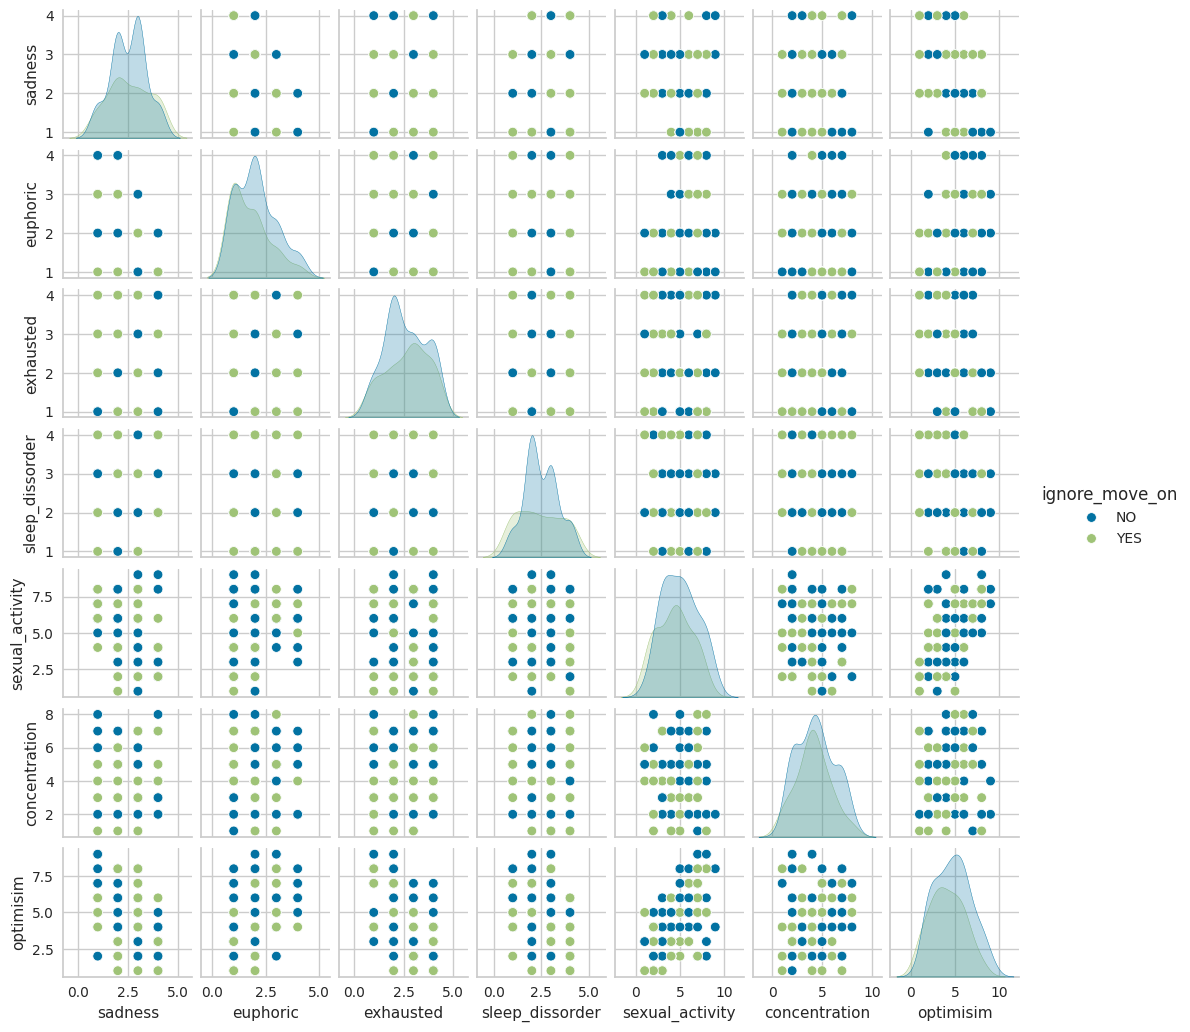

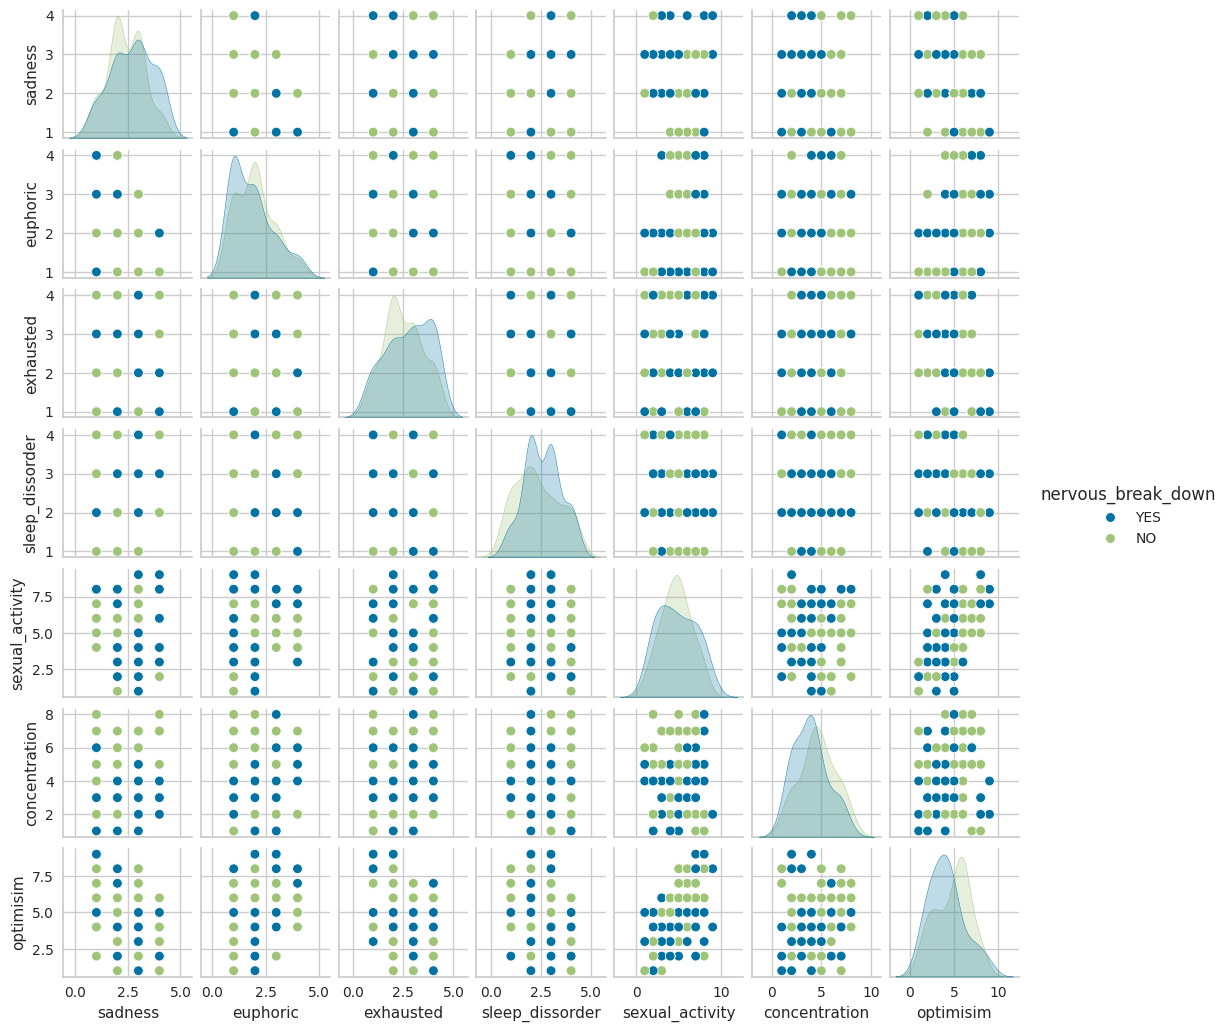

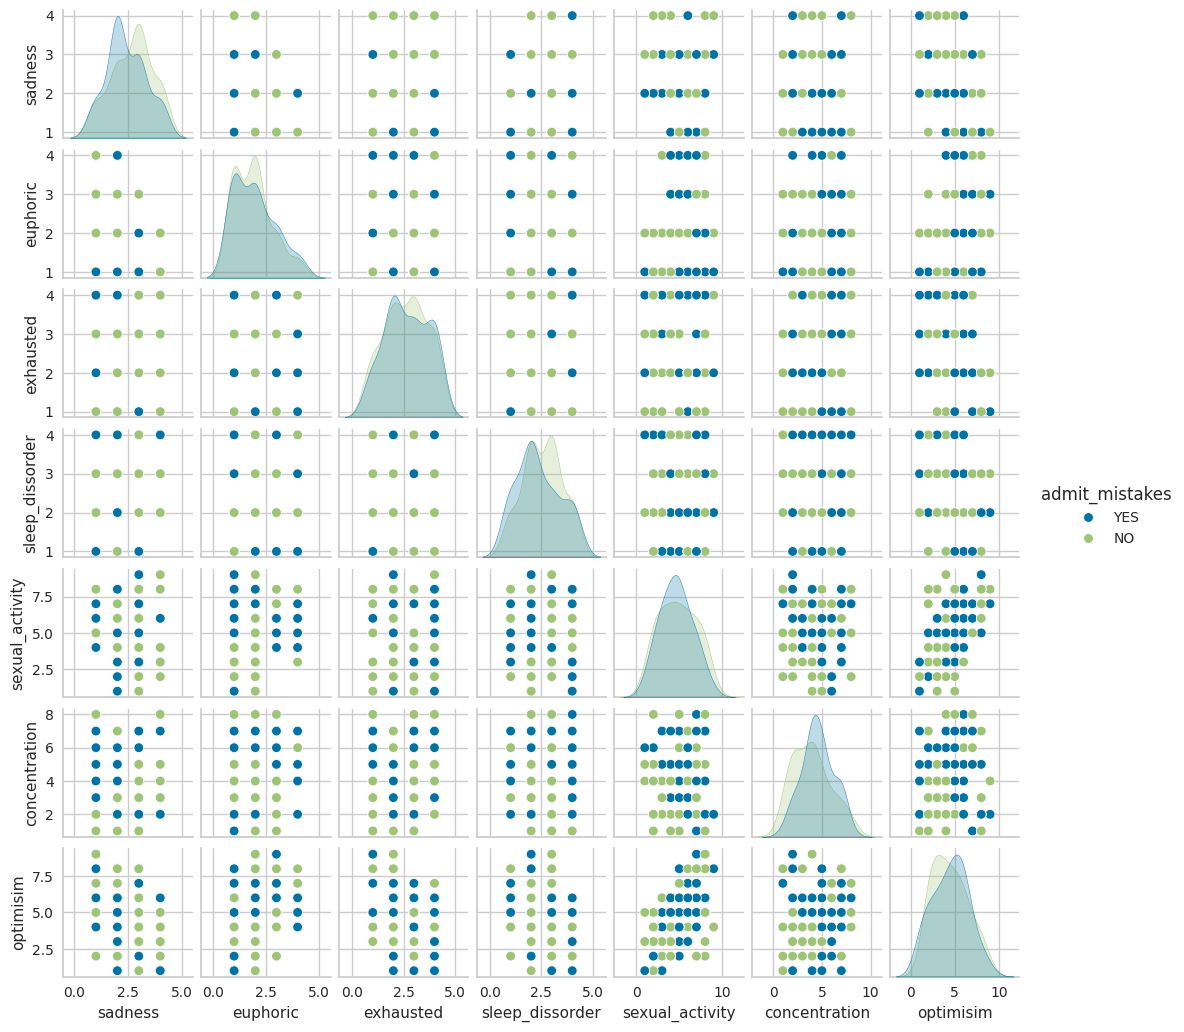

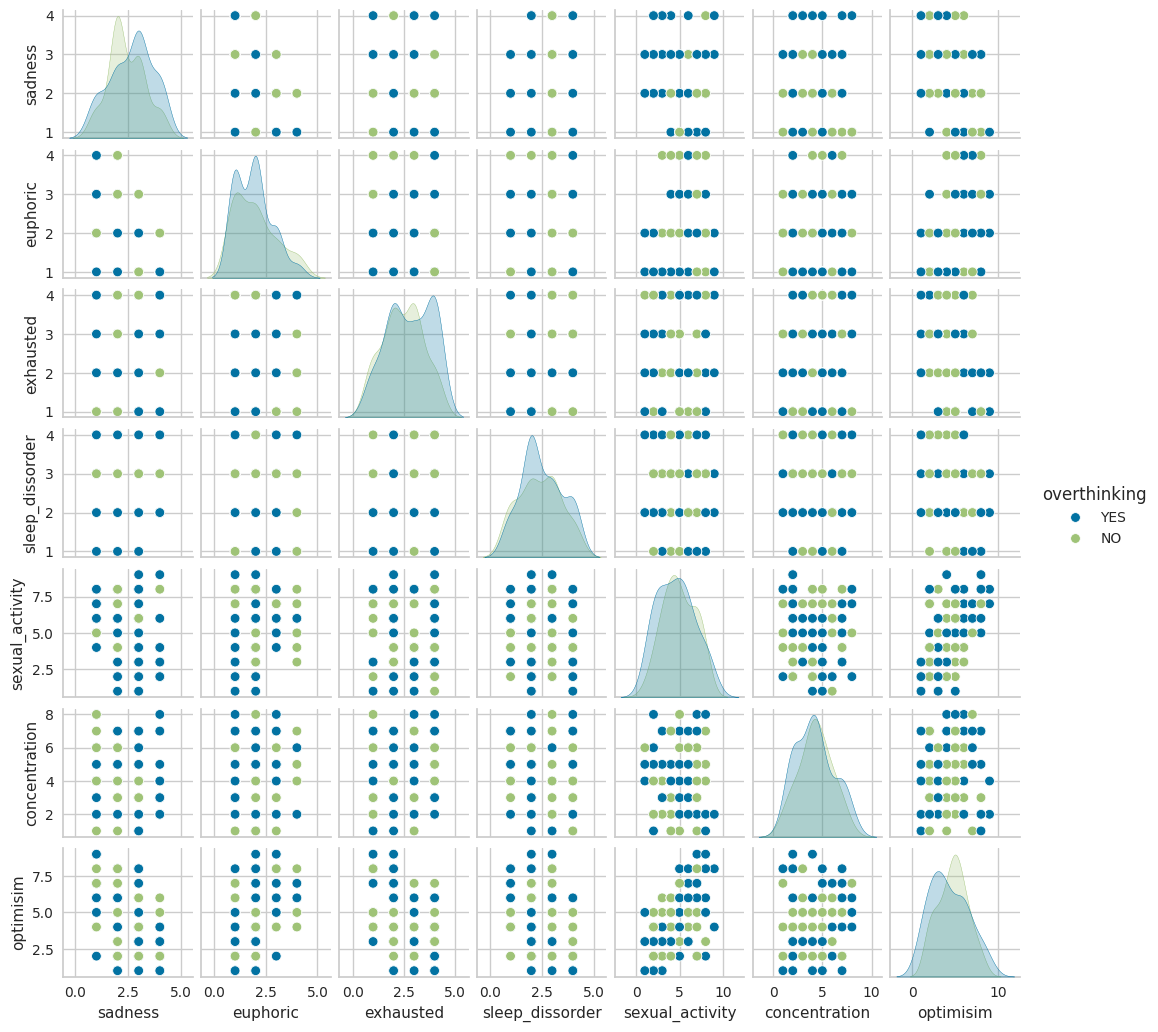

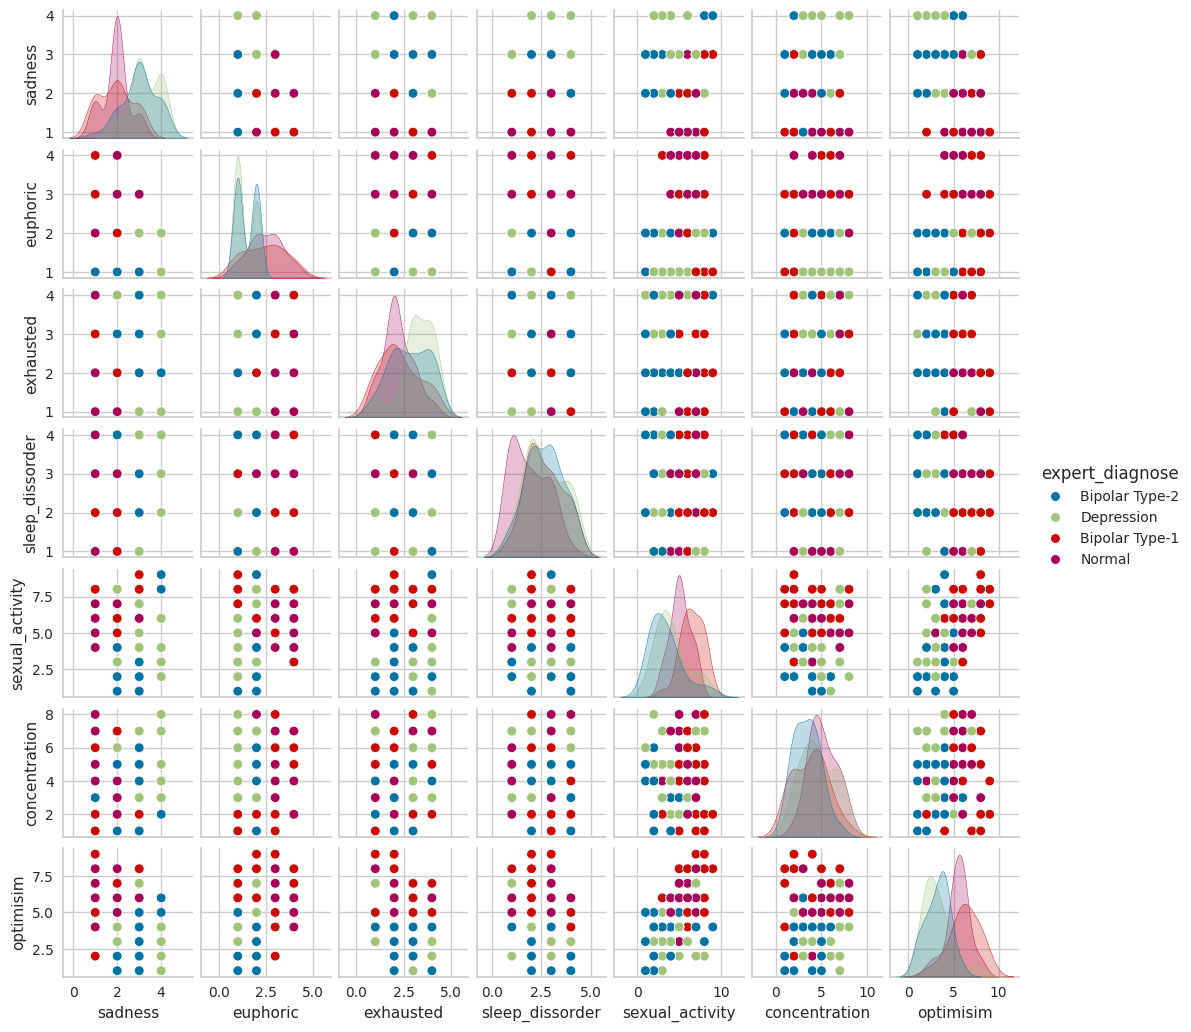

In [216]:
for i in range(0, len(cat_cols)):
  hue_cat = cat_cols[i]
  sns.pairplot(data,hue=hue_cat,height=1.5)

Some conclusions derived from the multivariate analysis show:
- A relatively proportional relationship between the categorical variable "suicidal_thoughts" and the numerical variables "sadness," "exhausted," and "sleep_disorders." 
- It was observed that a high concentration of people with “suicidal_thoughts” present low to moderately low levels of “euphoria.”. 
- In contrast, those who have not experienced "suicidal_thoughts" tend to show moderately high levels of "optimism" and "sexual_activity". 
- Likewise, a positive relationship was found between the expert diagnosis of "depression" and high levels of "exhausted" and "sadness", while a negative relationship was observed between "euphoria" and "optimism".

# Feature Engineering

In [217]:
data.describe()

sadness    euphoric   exhausted  sleep_dissorder  sexual_activity  \
count  120.000000  120.000000  120.000000       120.000000       120.000000   
mean     2.550000    1.933333    2.633333         2.458333         4.741667   
std      0.924458    0.923396    1.020243         0.977871         2.010459   
min      1.000000    1.000000    1.000000         1.000000         1.000000   
25%      2.000000    1.000000    2.000000         2.000000         3.000000   
50%      3.000000    2.000000    3.000000         2.000000         5.000000   
75%      3.000000    2.000000    3.250000         3.000000         6.000000   
max      4.000000    4.000000    4.000000         4.000000         9.000000   

       concentration   optimisim  
count     120.000000  120.000000  
mean        4.250000    4.466667  
std         1.797524    1.991298  
min         1.000000    1.000000  
25%         3.000000    3.000000  
50%         4.000000    4.000000  
75%         5.000000    6.000000  
max         8.000000    9.000000

## Variable Selection

We define the target variable `expert_diagnose` and split the dataset.

In [218]:
target = "expert_diagnose"
X = data.drop(columns=target)
y = data[target]

## Variable Conversion

We apply one-hot encoding to transform the categorical variables into a numerical format.

In [219]:
X = pd.get_dummies(X, columns=cat_cols.remove(target), drop_first=True, dtype=int)
X.head(3)

sadness  euphoric  exhausted  sleep_dissorder  sexual_activity  \
0        3         1          2                2                3   
1        3         1          3                2                4   
2        2         4          2                2                6   

   concentration  optimisim  mood_swing_YES  suicidal_thoughts_YES  \
0              3          4               1                      1   
1              2          5               0                      1   
2              5          7               1                      0   

   anorxia_YES  authority_respect_YES  try_explanation_YES  \
0            0                      0                    1   
1            0                      0                    0   
2            0                      0                    1   

   aggressive_response_YES  ignore_move_on_YES  nervous_break_down_YES  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        1                   0                       1   

   admit_mistakes_YES  overthinking_YES  
0                   1                 1  
1                   0                 0  
2                   1                 0

## Heat Map: Correlation

<Axes: >

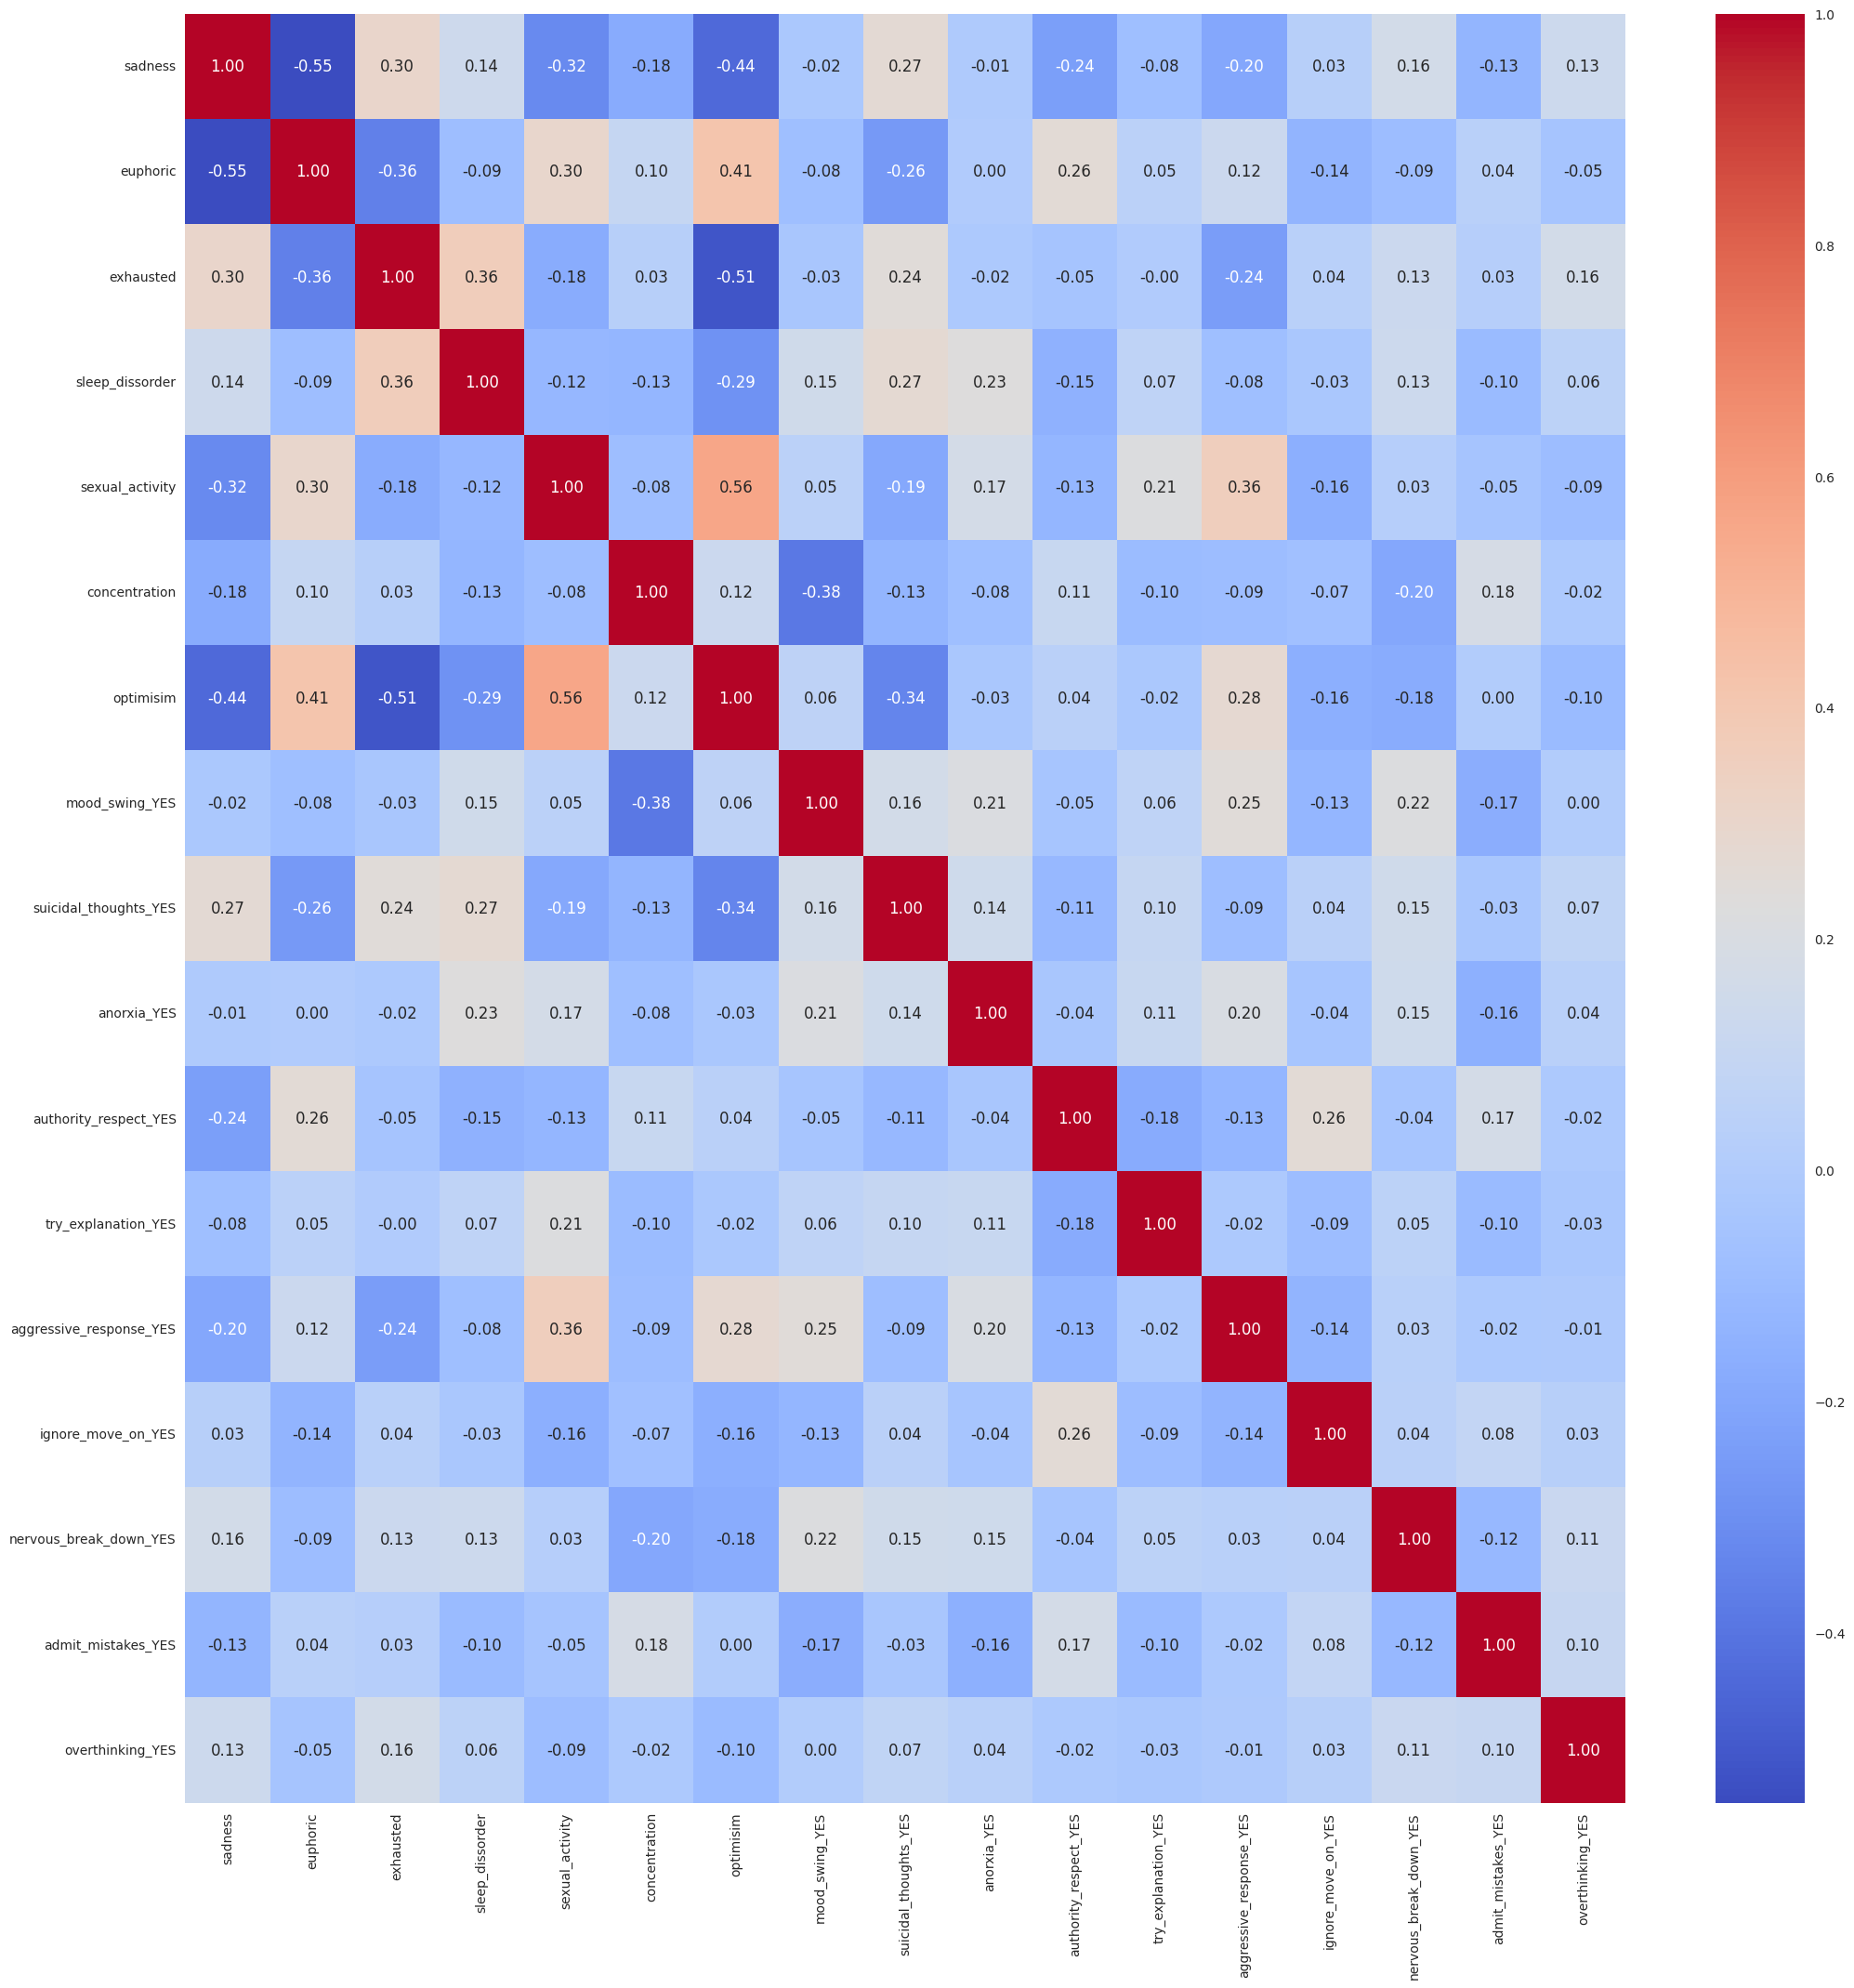

In [220]:
plt.figure(figsize=(25, 25))
correlacion = X.corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")

> According to the correlation heat map analysis, the independent variables do not show high correlations with each other, indicating low collinearity.

### Filter by Variance 0

In [221]:
deleted = data.columns[data.nunique() == 1].tolist()
print("Columns eliminated by zero variance:", deleted)
df_cleaned = data.loc[:, data.nunique() > 1]

Columns eliminated by zero variance: []


## 🧠 Evaluating the importance of variables

We will explore and compare different models to evaluate the importance of variables.

- 🌳 Decision Tree

- 🌲 Random Forest

- 📈 Logistic Regression

- 🧪 Chi-Square


### 🌳 Decision Tree

<Axes: >

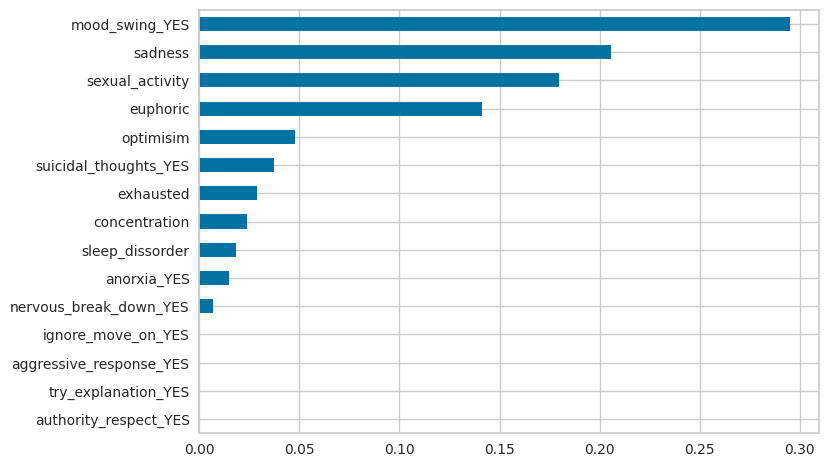

In [222]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X, y)
dtc_importances = pd.Series(dtc.feature_importances_, index=X.columns)
dtc_importances.sort_values(ascending=False).head(15).sort_values().plot(kind="barh")

### 🌲 Random Forest

<Axes: >

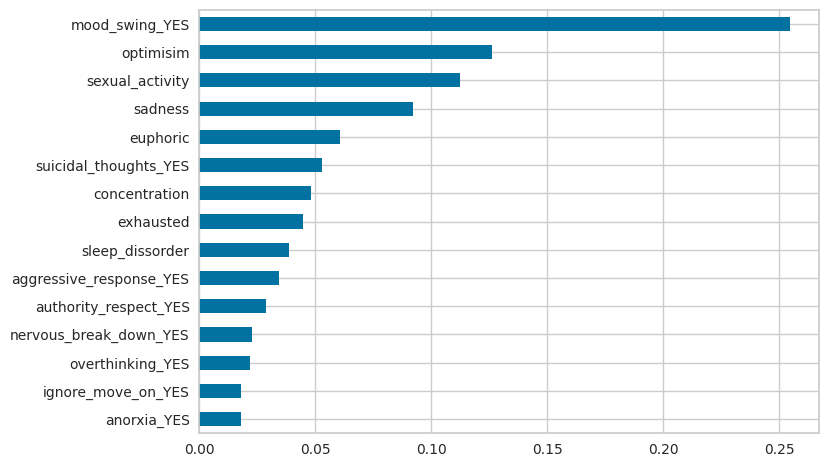

In [223]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns)
rf_importances.sort_values(ascending=False).head(15).sort_values().plot(kind="barh")


### 📈 Logistic Regression

<Axes: >

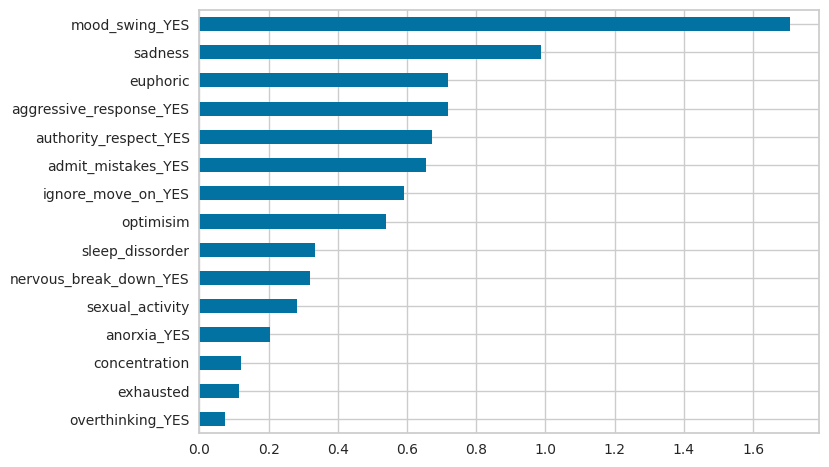

In [224]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X, y)

lr_importance = pd.Series(abs(lr.coef_[0]), index=X.columns)
lr_importance.sort_values(ascending=False).head(15).sort_values().plot(kind="barh")


### 🧪 Chi-square

<Axes: >

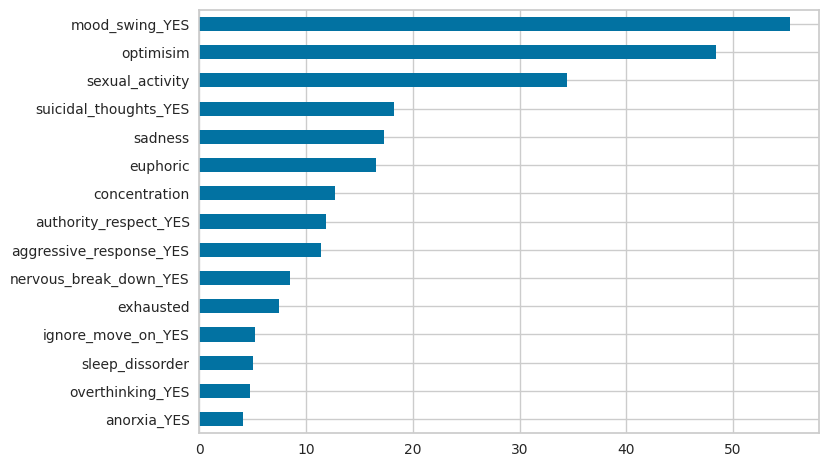

In [225]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)
scores = pd.Series(selector.scores_, index=X.columns)
scores.sort_values(ascending=False).head(15).sort_values().plot(kind="barh")

mood_swing_YES, optimisim, sexual_activity, suicidal_thoughts, are some of the variables that stand out the most in the levels of importance detected in each method.

In this case we are going to select the 11 most important variables according to the Decision Tree model.

In [226]:
features = dtc_importances.sort_values(ascending=False).head(11).index.tolist()
features

['mood_swing_YES',
 'sadness',
 'sexual_activity',
 'euphoric',
 'optimisim',
 'suicidal_thoughts_YES',
 'exhausted',
 'concentration',
 'sleep_dissorder',
 'anorxia_YES',
 'nervous_break_down_YES']

# 🤖 Models to be applied

We are going to use:

- 📈 Logistic Regression (Linear)
- 🌳 Decision Tree (Non-Linear)

In [227]:
from sklearn.linear_model import LogisticRegression

## 🔀 Split: Train, Validation and Test sets

To effectively evaluate the performance and generalization of our models, the dataset is divided into three parts: training, validation, and test sets.

- **Training set**: Used to train the machine learning models.
- **Validation set**: Used to fine-tune the model and select hyperparameters.
- **Test set**: Used to evaluate the final performance of the selected model on raw data.

In [228]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

X_train_final = pd.concat([X_train, X_val], axis=0, ignore_index=True)
Y_train_final  = pd.concat([y_train, y_val], axis=0, ignore_index=True)

## 🛠️ Hyperparameter Selection

In [229]:
from sklearn.metrics import accuracy_score, classification_report
from plotly.subplots import make_subplots
import plotly.graph_objs as go

def evaluate_model(y_true, y_pred, dataset_name=""):
    print(f"\n--- Evaluation on {dataset_name} set ---" if dataset_name else "\n--- Model Evaluation ---")
    print(classification_report(y_true, y_pred))


### 📈 Logistic Regression

#### Impact of hyperparameter C on accuracy

In [230]:
C_vals = np.logspace(-3, 2, 25)

results = [
    (
        (model := LogisticRegression(C=c, random_state=42, solver='newton-cg')).fit(X_train, y_train),
        c
    )
    for c in C_vals
]

train_scores = [model.score(X_train, y_train) for model, _ in results]
val_scores = [model.score(X_val, y_val) for model, _ in results]

fig = go.Figure()
fig.add_trace(go.Scatter(x=C_vals, y=train_scores, mode='lines+markers', name='Train Accuracy'))
fig.add_trace(go.Scatter(x=C_vals, y=val_scores, mode='lines+markers', name='Validation Accuracy'))

fig.update_layout(
    title='Accuracy vs C (Logistic Regression)',
    xaxis=dict(title='C', type='log'),
    yaxis=dict(title='Accuracy'),
    legend=dict(x=0.05, y=0.95)
)

fig.show()


Looking at the curve, we can see that for low values ​​of C, both training and validation accuracy are low. As C increases, accuracy improves.

In this case, we'll use C = 0.5. At this point, the model achieves good validation accuracy (approximately 90%) while maintaining a reasonable gap with the training accuracy.

In [231]:
clf_log_model = LogisticRegression(C=0.5, solver='newton-cg', random_state=42)
clf_log_model.fit(X_train_final, Y_train_final)

LogisticRegression(C=0.5, random_state=42, solver='newton-cg')

#### 📊 Evaluation - Train

In [232]:
y_pred_train = clf_log_model.predict(X_train_final)
evaluate_model(Y_train_final, y_pred_train, dataset_name="Training")


--- Evaluation on Training set ---
                precision    recall  f1-score   support

Bipolar Type-1       0.91      0.95      0.93        22
Bipolar Type-2       0.96      0.96      0.96        25
    Depression       1.00      0.96      0.98        25
        Normal       1.00      1.00      1.00        24

      accuracy                           0.97        96
     macro avg       0.97      0.97      0.97        96
  weighted avg       0.97      0.97      0.97        96



The model shows outstanding performance on the training set, with an overall accuracy of 96.88%. The precision, recall, and F1-score metrics are consistently high for all classes, particularly in the "Normal" class, where it achieves perfect values ​​(1.00).

#### 📊 Evaluation - Test

In [233]:
y_pred_test = clf_log_model.predict(X_test)
evaluate_model(y_test, y_pred_test, dataset_name="Test")


--- Evaluation on Test set ---
                precision    recall  f1-score   support

Bipolar Type-1       1.00      1.00      1.00         6
Bipolar Type-2       1.00      1.00      1.00         6
    Depression       0.75      1.00      0.86         6
        Normal       1.00      0.67      0.80         6

      accuracy                           0.92        24
     macro avg       0.94      0.92      0.91        24
  weighted avg       0.94      0.92      0.91        24



The model achieves an accuracy of 91.67% on the test set, indicating good overall performance when classifying unseen data.

- The "Bipolar Type-1" and "Bipolar Type-2" classes were perfectly classified, with an F1-score of 1.00.

- The "Depression" class also shows good performance (F1-score = 0.86), albeit with lower accuracy.

- In the "Normal" class, the model maintains perfect accuracy but has a lower recall (0.67), indicating that some instances of this class were not correctly identified.

### 🌲 Decision Tree Classifier

#### Impact of Hyperparameters on Decision Tree Performance

In [234]:
hp = [
    ('max_leaf_nodes', range(2, 50, 5)),
    ('max_depth', range(2, 8)),
    ('min_samples_leaf', range(1, 50, 5))
]

fig = make_subplots(1, 3, subplot_titles=[n.replace('_',' ').title() for n,_ in hp])

for i, (param, vals) in enumerate(hp, 1):
    stats = [
        (
            (model := DecisionTreeClassifier(random_state=42)
                     .set_params(**{param: v})
                     .fit(X_train, y_train)),
            model.score(X_train, y_train),
            model.score(X_val, y_val),
            # model.score(X_test, y_test)
        )
        for v in vals
    ]

    fig.add_trace(go.Scatter(x=list(vals), y=[train for _, train, val in stats],
                             mode='lines+markers', name=f'Train ({param})'), 1, i)
    fig.add_trace(go.Scatter(x=list(vals), y=[val for _, train, val in stats],
                             mode='lines+markers', name=f'Validation ({param})'), 1, i)

fig.show()


In the Max Leaf Nodes graph, we see that validation accuracy peaks and stabilizes around 0.8 accuracy starting with 10-12 leaf nodes. In this case, we'll use 12 leaf nodes, as it allows us to capture sufficient model complexity without incurring excessive risk of overfitting.

In [235]:

clf_dtc_model = DecisionTreeClassifier(random_state=42, max_leaf_nodes=12)
clf_dtc_model.fit(X_train_final, Y_train_final)

DecisionTreeClassifier(max_leaf_nodes=12, random_state=42)

#### Plot Tree

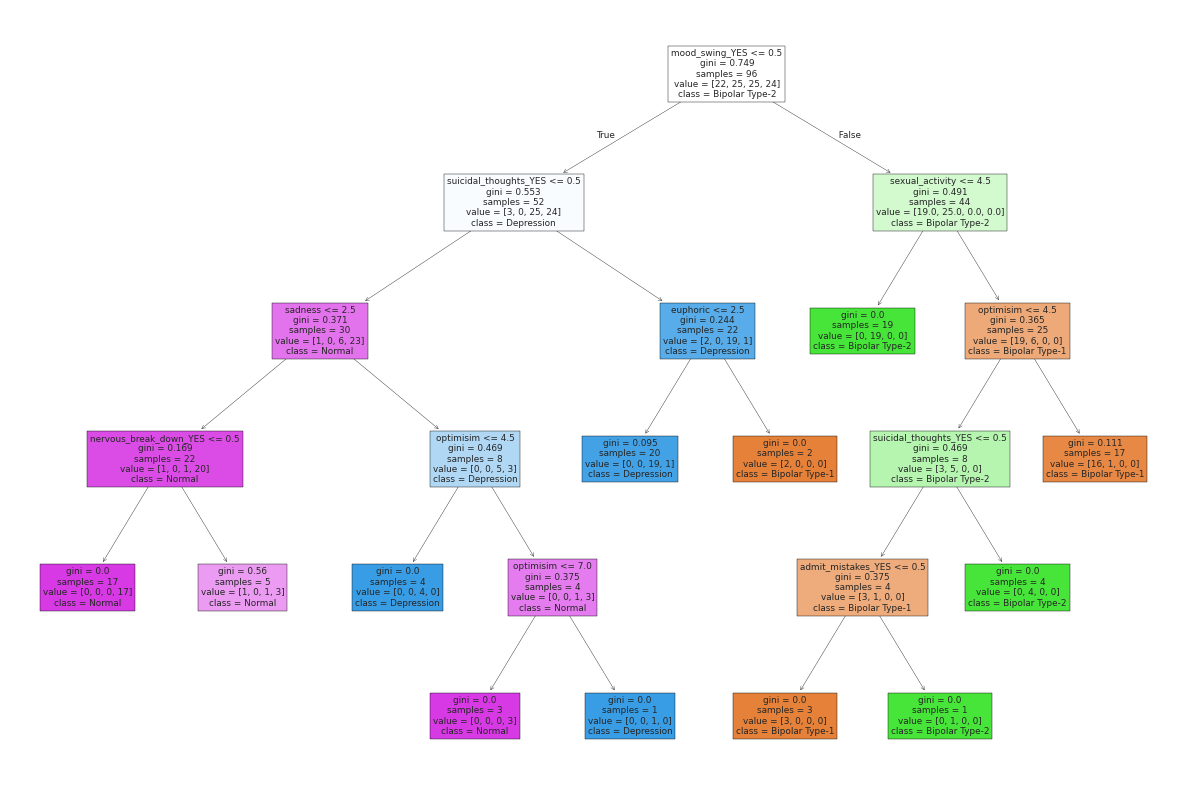

In [236]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(clf_dtc_model, feature_names=X.columns, class_names=clf_dtc_model.classes_, filled=True)
plt.show()

#### 📊 Evaluation - Train

In [237]:
y_pred_dtc_train = clf_dtc_model.predict(X_train_final)
evaluate_model(Y_train_final, y_pred_dtc_train, dataset_name="Training")



--- Evaluation on Training set ---
                precision    recall  f1-score   support

Bipolar Type-1       0.95      0.95      0.95        22
Bipolar Type-2       1.00      0.96      0.98        25
    Depression       0.96      0.96      0.96        25
        Normal       0.92      0.96      0.94        24

      accuracy                           0.96        96
     macro avg       0.96      0.96      0.96        96
  weighted avg       0.96      0.96      0.96        96



The model achieved an accuracy of 96%, indicating good overall performance during learning. All classes were classified with high precision and recall, with "Bipolar Type-2" standing out with perfect accuracy (1.00) and a recall of 0.96. The "Bipolar Type-1" and "Depression" classes obtained balanced precision and recall values ​​(both 0.95 or higher), while the "Normal" class showed a slight tendency toward overprediction, with a precision of 0.92 and a recall of 0.96. Overall.

#### 📊 Evaluation - Test

In [238]:
y_pred_dtc_test = clf_dtc_model.predict(X_test)
evaluate_model(y_test, y_pred_dtc_test, dataset_name="Test")




--- Evaluation on Test set ---
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.67      0.80         6
Bipolar Type-2       0.67      1.00      0.80         6
    Depression       0.86      1.00      0.92         6
        Normal       1.00      0.67      0.80         6

      accuracy                           0.83        24
     macro avg       0.88      0.83      0.83        24
  weighted avg       0.88      0.83      0.83        24



On the test set, the model achieved an accuracy of **83.33%**, indicating a moderate level of generalization.

* The Bipolar Type-1 class had perfect precision (1.00) but a lower recall (0.67), meaning some true cases were missed.

* The Bipolar Type-2 class showed the opposite behavior, with high recall (1.00) but lower precision (0.67), suggesting the model tended to overpredict this class.

* For the Depression class, the model performed well, with a precision of 0.86 and recall of 1.00, showing it correctly identified all depressive cases with few false positives.

* The Normal class also had perfect precision (1.00) but a recall of 0.67, indicating some normal instances were misclassified as other conditions.


## 🧪 Model Comparison

In this section, the trained models will be compared using various evaluation metrics to determine which one performs best in the classification task.

The following elements will be used:

- classification_report: to view detailed metrics such as precision, recall, and F1-score per class.

- Confusion matrix: to visualize classification errors and see which classes are most frequently confused.

- ROC AUC curves: to analyze the performance of the models in terms of sensitivity vs. specificity for each class.

- F1-score comparison graph: which summarizes the performance by class and by model in a visual manner.

In [239]:
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

In [240]:
classes, classifiers = sorted(y_train.unique()), [clf_dtc_model, clf_log_model]
print(classes)
print(classifiers)

['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal']
[DecisionTreeClassifier(max_leaf_nodes=12, random_state=42), LogisticRegression(C=0.5, random_state=42, solver='newton-cg')]


### Classification Reports

In [241]:
def plot_classification_reports(x, y_true, classifiers, classes, classifier_names=None):
    if classifier_names is None:
        classifier_names = [f"Model {i+1}" for i in range(len(classifiers))]

    fig, axes = plt.subplots(1, len(classifiers), figsize=(16, 6))

    for i, (clf, name) in enumerate(zip(classifiers, classifier_names)):
        y_pred = clf.predict(x)
        report_dict = classification_report(y_true, y_pred, target_names=classes, output_dict=True)
        df_display = pd.DataFrame(report_dict).T.iloc[:-3][['precision', 'recall', 'f1-score', 'support']].copy()

        df_heat = df_display.copy()
        df_heat = df_heat.astype(float)

        mask = df_heat.columns == 'support'
        mask = pd.DataFrame(False, index=df_heat.index, columns=df_heat.columns)
        mask['support'] = True
        
        ax = axes[i]
        sns.heatmap(df_heat, annot=df_display.round(2), fmt='', cmap='Blues',
                    linewidths=0.5, cbar=True, mask=mask, ax=ax, vmin=0.0, vmax=1.0)
        
        for y_idx, label in enumerate(df_display.index):
            support_val = df_display.loc[label, 'support']
            ax.add_patch(plt.Rectangle((3, y_idx), 1, 1, fill=True, color='#e0e0e0', lw=0))
            ax.text(3.5, y_idx + 0.5, f'{support_val:.0f}', va='center', ha='center', color='black')

        ax.set_title(f'{name} - Classification Report')
        ax.set_xlabel('Metrics')
        ax.set_ylabel('Classes')
        ax.set_xticklabels(['precision', 'recall', 'f1-score', 'support'])

    plt.tight_layout()
    plt.show()

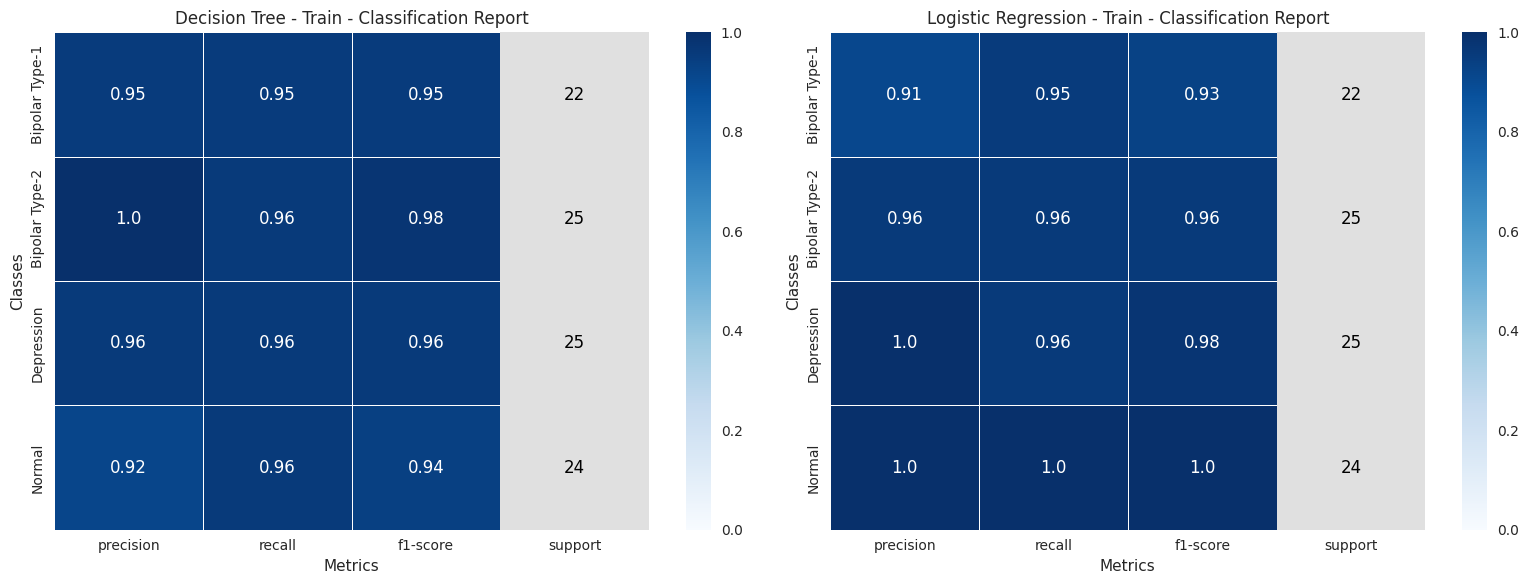

In [242]:
classifier_names =  ['Decision Tree - Train', 'Logistic Regression - Train']
plot_classification_reports(X_train_final, Y_train_final, classifiers, classes, classifier_names)


On the training set, both models demonstrated exceptionally high performance, with most metrics (precision, recall, f1-score) close to 1.0 for all classes.

Logistic Regression showed a slight advantage in some areas, achieving perfect recall (1.0) for the 'Normal' class, and perfect precision (1.0) for the 'Depression' and 'Normal' classes.

The Decision Tree model also performed very well, but with slightly lower scores for some metrics, such as a precision of 0.96 for 'Depression' and a precision of 0.92 for 'Normal' (compared to 1.0 for Logistic Regression). 

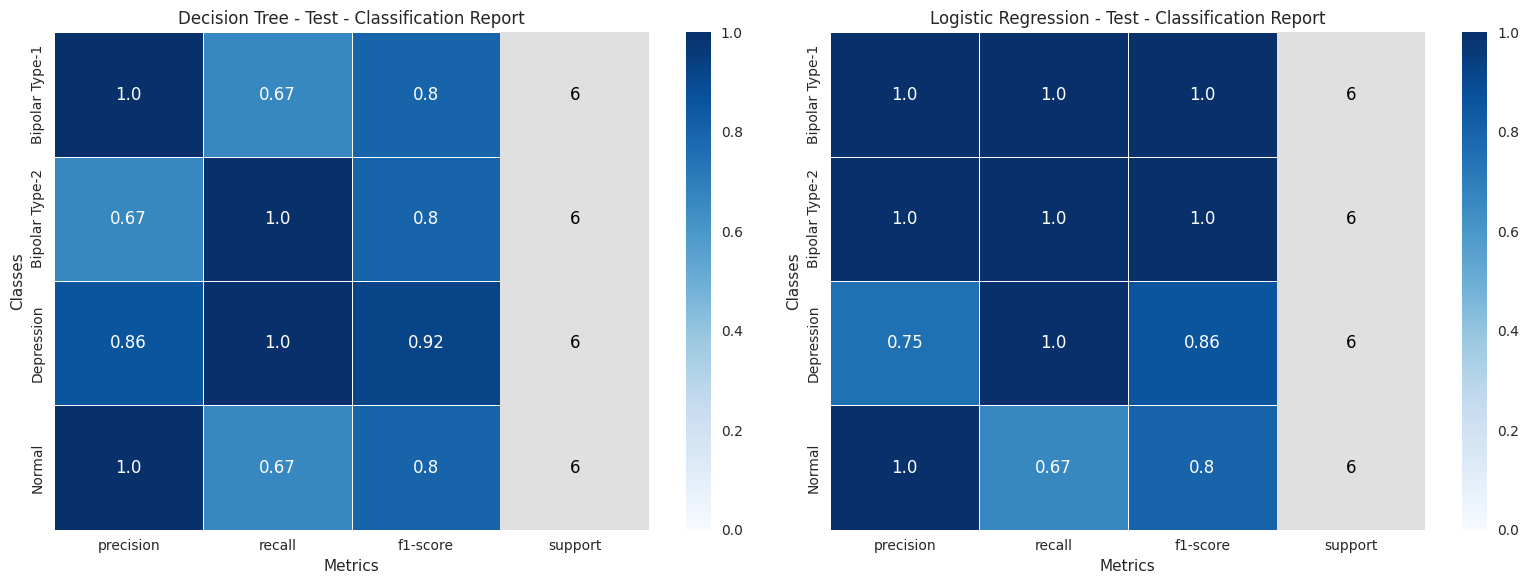

In [243]:
classifier_names =  ['Decision Tree - Test', 'Logistic Regression - Test']

plot_classification_reports(X_test, y_test, classifiers, classes, classifier_names)

On the test set, the Decision Tree model maintained strong precision for 'Bipolar Type-1' (1.0) and 'Normal' (1.0), and perfect recall (1.0) for 'Bipolar Type-2' and 'Depression'. However, it experienced a noticeable drop in recall for 'Bipolar Type-1' (0.67) and 'Normal' (0.67), indicating that it failed to identify a significant portion of true positive cases for these classes. 

The Logistic Regression model demonstrated more consistent performance on this set. It maintained perfect recall (1.0) for 'Bipolar Type-1', 'Bipolar Type-2', and 'Depression', meaning that it correctly identified all instances of these conditions when they were present. While its precision for 'Depression' (0.75) was lower than that of the Decision Tree, its f1 scores for 'Bipolar Type-1' and 'Bipolar Type-2' were all 1. For the “Normal” class, logistic regression achieved perfect precision (1.0) but also experienced a drop in recall to 0.67, yielding an f1 score of 0.8.

### Confusion Matrix

#### Train Set

/home/garayco/.cache/pypoetry/virtualenvs/ml-assignment-2-exGsqxCo-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/home/garayco/.cache/pypoetry/virtualenvs/ml-assignment-2-exGsqxCo-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



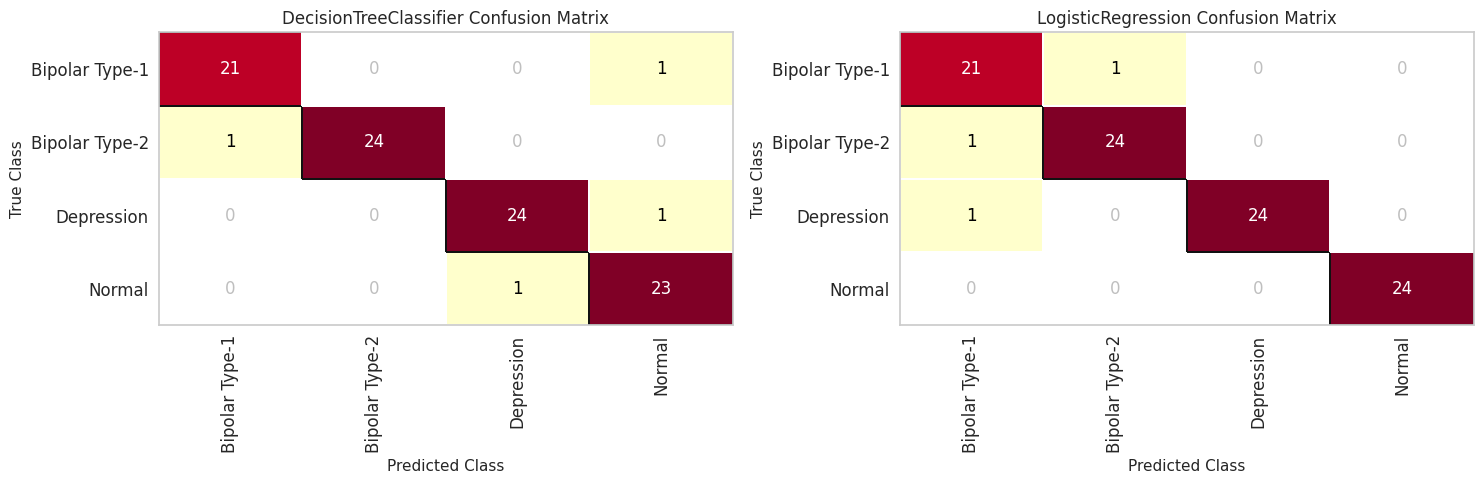

In [244]:
fig, axe = plt.subplots(ncols=2,nrows=1,figsize=(15, 5))
fig.tight_layout(pad=8.0)
visualgrid = [ConfusionMatrix(classifiers[0], classes=classes, support=True, ax=axe[0]),
              ConfusionMatrix(classifiers[1], classes=classes, support=True, ax=axe[1])]
for viz in visualgrid:
  viz.fit(X_train_final, Y_train_final)
  viz.score(X_train_final, Y_train_final)
  viz.finalize()
fig.show()

On the training set, both models correctly classify the vast majority of cases, with the main diagonals dominating. However, Logistic Regression demonstrates a slight advantage by perfectly classifying the "Normal" class (24/24), while Decision Tree makes an error in this category and distributes its errors slightly differently in other classes.

/home/garayco/.cache/pypoetry/virtualenvs/ml-assignment-2-exGsqxCo-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/home/garayco/.cache/pypoetry/virtualenvs/ml-assignment-2-exGsqxCo-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



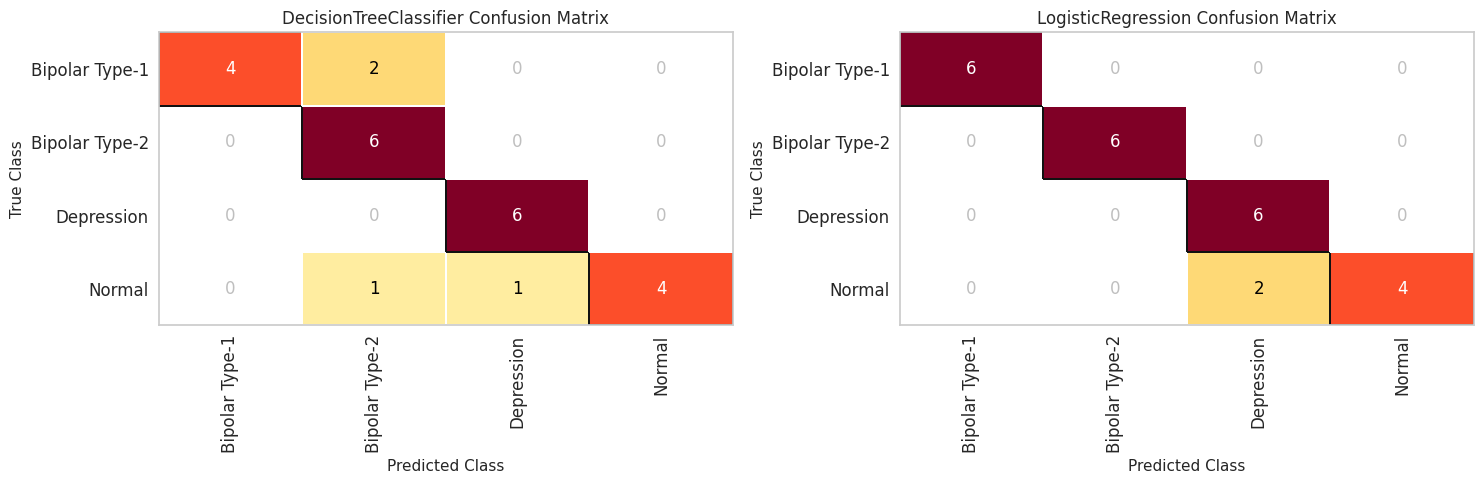

In [245]:
fig, axe = plt.subplots(ncols=2,nrows=1,figsize=(15, 5))
fig.tight_layout(pad=8.0)
visualgrid = [ConfusionMatrix(classifiers[0], classes=classes, support=True, ax=axe[0]),
              ConfusionMatrix(classifiers[1], classes=classes, support=True, ax=axe[1])]
for viz in visualgrid:
  viz.fit(X_train_final, Y_train_final)
  viz.score(X_test, y_test)
  viz.finalize()
fig.show()

On the test set, Logistic Regression outperforms Decision Tree by perfectly classifying the classes 'Bipolar Type-1', 'Bipolar Type-2', and 'Depression', with no errors. Although both models fail in the 'Normal' class (4 out of 6 correct), Decision Tree exhibits additional errors in the classification of 'Bipolar Type-1' and 'Normal' (2 errors each), demonstrating that Logistic Regression is the most robust and accurate model in this data scenario.

### ROC Curve Comparison

#### Train

/home/garayco/.cache/pypoetry/virtualenvs/ml-assignment-2-exGsqxCo-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/home/garayco/.cache/pypoetry/virtualenvs/ml-assignment-2-exGsqxCo-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



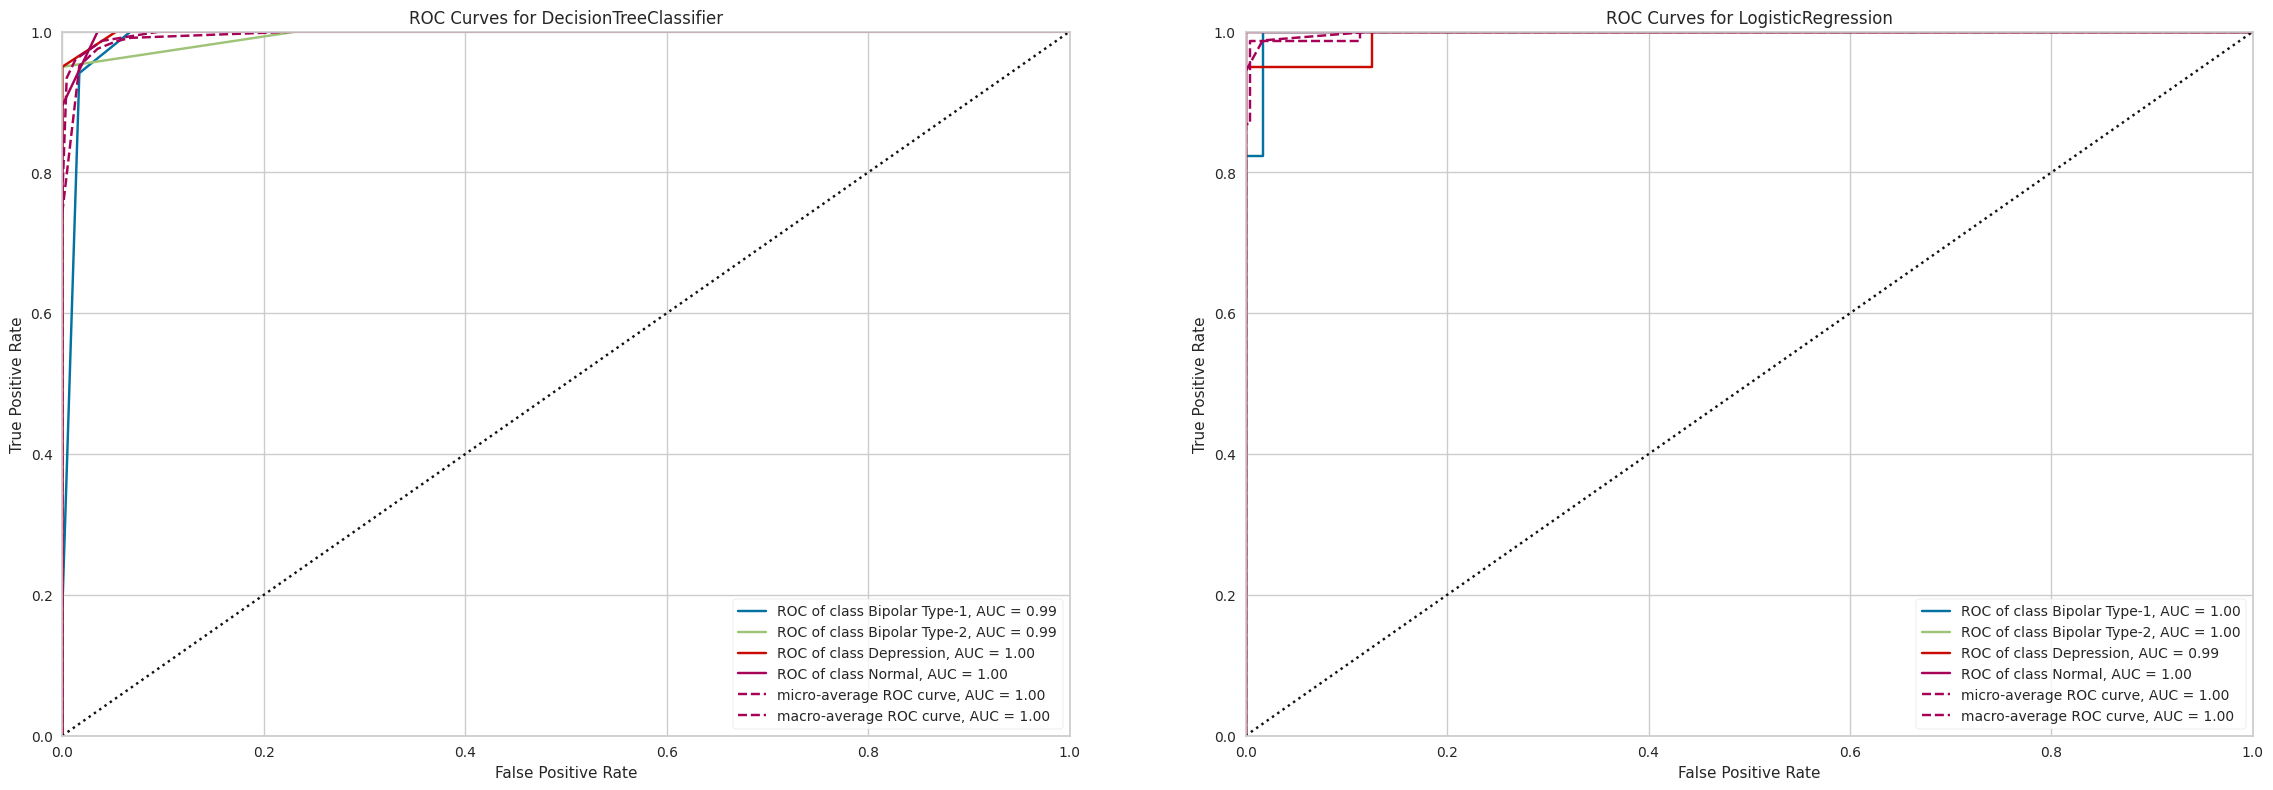

In [246]:
fig, axe = plt.subplots(ncols=2,figsize=(25, 10))
fig.tight_layout(pad=8.0)
visualgrid = [ROCAUC(classifiers[0], classes=classes, ax=axe[0]),
              ROCAUC(classifiers[1], classes=classes, ax=axe[1])]

for viz in visualgrid:
  viz.fit(X_train, y_train)
  viz.score(X_train, y_train)
  viz.finalize()

plt.show()

The ROC curves of both models, Decision Tree and Logistic Regression, show exceptional predictive performance, with most classes and averages (macro and micro) reaching an Area Under the Curve (AUC) of 1.00 or very close to 1.00. This indicates that both classifiers are almost perfect in distinguishing between classes in the evaluated dataset. Logistic Regression, in particular, presents curves that stick even more to the top left corner, reflecting its ability to achieve very high recall.

#### Test

/home/garayco/.cache/pypoetry/virtualenvs/ml-assignment-2-exGsqxCo-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/home/garayco/.cache/pypoetry/virtualenvs/ml-assignment-2-exGsqxCo-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



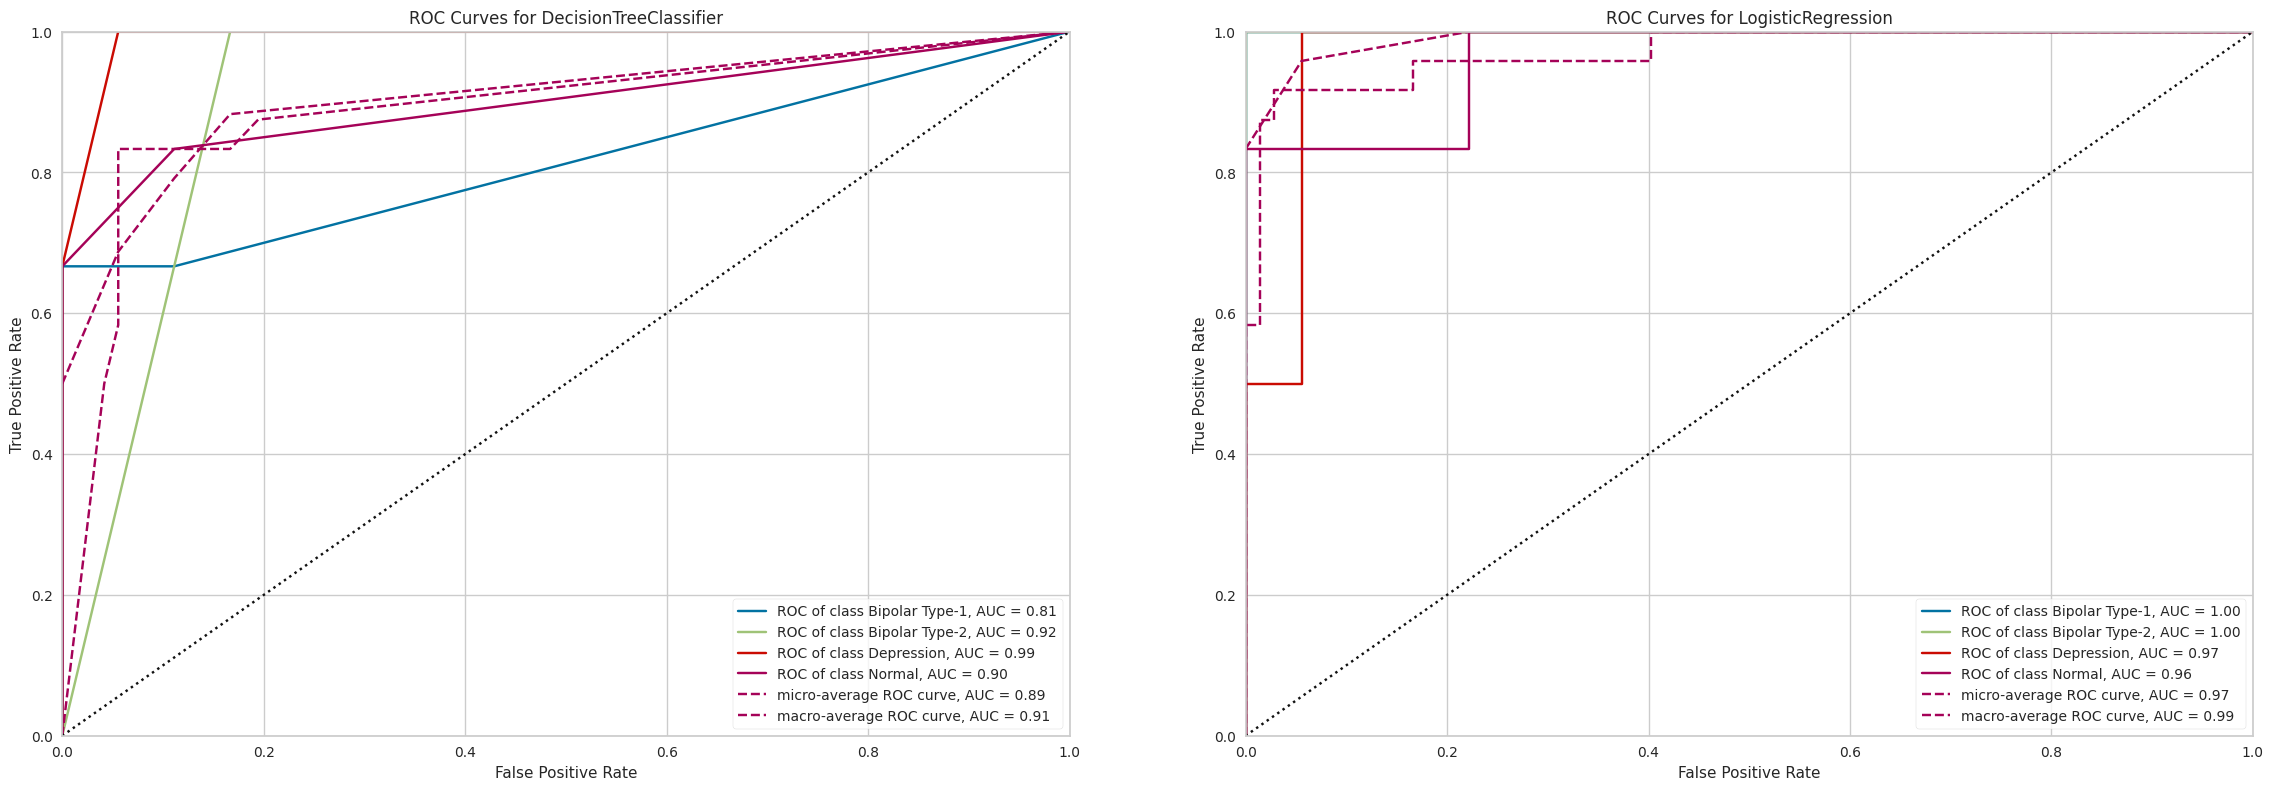

In [247]:
fig, axe = plt.subplots(ncols=2,figsize=(25, 10))
fig.tight_layout(pad=8.0)
visualgrid = [ROCAUC(classifiers[0], classes=classes, ax=axe[0]),
              ROCAUC(classifiers[1], classes=classes, ax=axe[1])]

for viz in visualgrid:
  viz.fit(X_train, y_train)
  viz.score(X_test, y_test)
  viz.finalize()

plt.show()

Logistic Regression demonstrates significantly superior and more consistent discriminatory ability than Decision Tree, with ROC curves of an AUC of 1.00 and very high values ​​for 'Depression' (0.97) and 'Normal' (0.96). In contrast, Decision Tree exhibits mixed performance and notable weakness for 'Bipolar Type-1' (AUC of 0.81), although performing well for 'Bipolar Type-2' and 'Depression'. The overall averages of Logistic Regression are substantially higher, confirming its clear advantage in distinguishing between the different classes in this dataset.

### Class-wise F1-Score Plot 

In [248]:

def plot_f1_scores(model_name, model):
    
    y_pred_train = model.predict(X_train)
    report_train = classification_report(y_train, y_pred_train, output_dict=True)
    df_train = pd.DataFrame(report_train).T.loc[classes]

    y_pred_test = model.predict(X_test)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)
    df_test = pd.DataFrame(report_test).T.loc[classes]

    trace_train = go.Scatter(
        x=classes,
        y=df_train['f1-score'],
        mode='lines+markers',
        name=f"{model_name} - Train"
    )

    trace_test = go.Scatter(
        x=classes,
        y=df_test['f1-score'],
        mode='lines+markers',
        name=f"{model_name} - Test"
    )

    layout = go.Layout(
        title=f'F1-score per Class - {model_name}',
        xaxis=dict(title='Class'),
        yaxis=dict(title='F1-score', range=[0, 1.1]),
        hovermode='closest'
    )

    fig = go.Figure(data=[trace_train, trace_test], layout=layout)
    fig.show()


In [249]:
plot_f1_scores("Decision Tree", clf_dtc_model)

It can be seen that, on the training set, the model consistently achieves very high F1 scores, close to 1.0 for all classes, indicating an excellent fit to the data it has seen. However, when evaluated on the test set, the F1 scores are noticeably lower for all classes, especially for 'Bipolar Type-1', 'Bipolar Type-2', and 'Normal', where the decline is more pronounced, and for 'Depression', where the reduction is smaller.

In [250]:
plot_f1_scores("Logistic Regression", clf_log_model)

On the training set, the model achieves consistently very high F1 scores, close to 1.0 for all classes, indicating an excellent fit to the data. On the test set, while there is a slight decrease in performance, Logistic Regression maintains remarkably robust F1 scores. The 'Bipolar Type-1' and 'Bipolar Type-2' classes show almost no decrease, maintaining an F1 score of 1.0. The 'Depression' and 'Normal' classes do show a decrease, with F1 scores of approximately 0.85 and 0.80, respectively. Despite these decreases, the gap between training and test performance is smaller and more controlled compared to Decision Tree.

# Conclusions

Throughout this notebook, several steps were taken to address a psychological condition classification problem. First, an exploratory data analysis (EDA) was carried out to better understand the characteristics of the dataset. Then, a hyperparameter search and tuning was performed using a validation set to identify the most appropriate configurations for each model. Finally, two classification models, Decision Tree and Logistic Regression, were compared, evaluating them using metrics such as precision, recall, F1 score, confusion matrix, and ROC-AUC curves, in both the training and test sets. The results show that both models achieved good overall performance, with Logistic Regression standing out for its greater consistency in test data, suggesting better generalization capacity. Although the Decision Tree obtained excellent metrics in training, it presents a greater drop in recall and precision in some test classes, indicating a possible tendency toward overfitting. The "Normal" class was the most difficult to predict for both models, with drops in recall in the test set. For these reasons, Logistic Regression may be preferable in this case, as it offers greater stability and generalizability to new data.